Voici une analyse détaillée de l'intérêt de chaque feature pour prédire la survie dans un cancer du sang :

## **ID (Identifiant patient)**
- **Intérêt direct** : Aucun pour la prédiction (simple identifiant)
- **Utilité** : Essentiel pour l'agrégation des données et le suivi longitudinal
- **Traitement** : À utiliser comme clé de regroupement, pas comme feature prédictive

## **CHR, START, END (Position génomique)** (pas plus important)
- **Intérêt modéré** : Indirect
- **Pourquoi** : Certaines régions chromosomiques sont plus critiques (ex: régions de gènes suppresseurs de tumeurs, oncogènes)
- **Exploitation** : 
  - Peut révéler des "hotspots" mutationnels associés à un mauvais pronostic
  - Utile pour identifier des clusters de mutations
  - Mieux utilisé via des features dérivées (ex: région régulatrice, densité de mutations)

## **REF et ALT (Nucléotides)** ( pas le plus important )
- **Intérêt faible** : Seuls, peu informatifs
- **Pourquoi** : Le type de substitution (transition vs transversion) peut indiquer certains processus mutationnels
- **Exploitation** :
  - Créer des features dérivées : type de mutation (C>T, A>G, etc.)
  - Signature mutationnelle (certains profils sont pronostiques)

## **GENE (Gène affecté)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Critical pour le pronostic
- **Pourquoi** : 
  - Certains gènes sont des **marqueurs pronostiques établis** (ex: TP53, FLT3, NPM1, DNMT3A dans les leucémies)
  - La présence/absence de mutations dans des gènes clés est souvent incluse dans les classifications de risque clinique
- **Exploitation** :
  - One-hot encoding ou embedding des gènes fréquents **(fait encoding spécial)**
  - Créer des features : nombre de gènes mutés **fait** , présence de gènes à haut risque **inclus dans l'encoding**
  - Grouper par voies biologiques **(fait)**

## **PROTEIN_CHANGE (Changement protéique)** ⭐ **IMPORTANT**
- **Intérêt élevé** : Très informatif
- **Pourquoi** :
  - Certaines mutations spécifiques sont des "drivers" connus (ex: FLT3-ITD, JAK2 V617F)
  - La position de la mutation dans la protéine affecte sa sévérité (domaine fonctionnel vs non-fonctionnel)
- **Exploitation** :
  - Identifier les mutations récurrentes ("hotspot mutations")
  - Distinguer les mutations dans des domaines critiques
  - Utiliser des bases de données comme COSMIC pour annoter les mutations connues

## **EFFECT (Catégorie d'effet)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Excellent prédicteur
- **Pourquoi** :
  - Les mutations avec perte de fonction (frameshift, nonsense) ont souvent un impact plus sévère que les missense
  - Permet de stratifier rapidement l'impact fonctionnel
- **Catégories typiques** : 
  - **Haut impact** : frameshift, stop gained/lost, splice site
  - **Moyen** : missense, inframe indels
  - **Faible** : synonymous, UTR
- **Exploitation** :
  - Feature catégorielle directe
  - Créer des scores agrégés : proportion de mutations à haut impact par patient

## **VAF (Variant Allele Fraction)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Potentiellement le plus prédictif
- **Pourquoi** :
  - **Charge tumorale** : VAF élevé = proportion importante de cellules mutées = tumeur plus agressive ou plus avancée
  - **Clonalité** : VAF élevé suggère une mutation "fondatrice" (précoce, présente dans toutes les cellules tumorales)
  - **Hétérogénéité** : Distribution des VAF indique la complexité clonale (mauvais pronostic si élevée)
- **Exploitation** :
  - VAF moyen/médian par patient
  - VAF max (mutation dominante)
  - Nombre de mutations avec VAF > seuil (ex: 0.3, 0.5)
  - Distribution/variance des VAF (hétérogénéité)
  - VAF pondéré par l'importance du gène

---

## **Features dérivées recommandées**

Pour maximiser la performance de votre modèle ML, créez ces features agrégées **par patient** :

1. **Charge mutationnelle**
   - Nombre total de mutations somatiques
   - Nombre de mutations à haut impact

2. **Profil génétique**
   - Présence/absence de gènes pronostiques connus
   - Score de risque génétique composite

3. **Métriques de VAF**
   - VAF moyen, médian, max
   - Écart-type des VAF (hétérogénéité)
   - Nombre de mutations avec VAF > 0.4 (mutations clonales)

4. **Complexité tumorale**
   - Nombre de voies biologiques affectées
   - Diversité des effets (entropie des catégories EFFECT)

5. **Interactions génétiques**
   - Co-occurrence de mutations (certaines combinaisons sont synergiques)

Ces données génomiques sont extrêmement riches pour la prédiction de survie dans les cancers hématologiques !

Voici une analyse détaillée de l'intérêt de chaque feature clinique pour prédire la survie :

## **ID (Identifiant patient)**
- **Intérêt** : Aucun (clé de jointure avec les données moléculaires)

## **CENTER (Centre clinique)** 
- **Intérêt modéré** : Potentiellement informatif
- **Pourquoi** :
  - **Qualité des soins** : Variations entre centres (expertise, protocoles)
  - **Biais de sélection** : Certains centres peuvent recruter des cas plus complexes
  - **Facteurs socio-économiques** : Accès aux traitements, suivi
- **Exploitation** :
  - Encoding catégoriel ou groupement par taille/expertise
  - Peut servir de variable de stratification
- **Attention** : Risque de sur-apprentissage si peu de patients par centre

## **BM_BLAST (Blastes médullaires en %)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Un des marqueurs pronostiques les plus puissants
- **Pourquoi** :
  - **Critère diagnostique** : Définit le type et le stade de la maladie (ex: MDS vs AML si >20%)
  - **Charge tumorale** : % élevé = maladie plus agressive
  - **Classification WHO** : Seuils pronostiques établis (5%, 10%, 20%)
  - Corrélé directement à la survie : plus le % est élevé, pire le pronostic
- **Exploitation** :
  - Feature continue très prédictive
  - Créer des catégories selon classifications cliniques
  - Interaction avec cytogénétique (blast + mauvaise cyto = très mauvais pronostic)

## **WBC (Globules blancs en G/L)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Marqueur pronostique établi
- **Pourquoi** :
  - **WBC élevé** (>20-30 G/L) = souvent mauvais pronostic dans les leucémies
  - Reflète la **prolifération tumorale**
  - **Leucocytose** peut indiquer une maladie agressive (ex: leucémie myélomonocytaire chronique)
  - Risque de complications (leucostase, syndrome de lyse tumorale)
- **Exploitation** :
  - Feature continue
  - Transformation log possible (distribution souvent asymétrique)
  - Seuils cliniques : <4, 4-10, 10-30, >30 G/L

## **ANC (Neutrophiles absolus en G/L)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Indicateur de fonction médullaire
- **Pourquoi** :
  - **Neutropénie** (<1.5 G/L) = risque infectieux, réserve médullaire faible
  - Reflète la capacité de la moelle à produire des cellules normales
  - ANC bas = moelle "envahie" par les cellules tumorales
  - **Pronostic** : ANC bas corrélé à survie réduite
- **Exploitation** :
  - Feature continue
  - Catégories cliniques : sévère (<0.5), modérée (0.5-1.0), normale (>1.5)

## **MONOCYTES (Monocytes en G/L)** ⭐ **IMPORTANT** (absent dans le test donc drop)
- **Intérêt élevé** : Spécifique selon le type de cancer
- **Pourquoi** :
  - **Monocytose** (>1 G/L) : critère diagnostique de certains cancers (LMMC = leucémie myélomonocytaire chronique)
  - Marqueur de sous-type de maladie
  - Peut indiquer une différenciation monocytaire anormale
- **Exploitation** :
  - Feature continue
  - Ratio monocytes/lymphocytes (si lymphocytes disponibles)
  - Seuil à 1 G/L pour monocytose

## **HB (Hémoglobine en g/dL)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Marqueur de sévérité
- **Pourquoi** :
  - **Anémie** = symptôme clé des cancers du sang (insuffisance médullaire)
  - HB bas (<10 g/dL) = mauvais pronostic établi
  - Reflète la capacité de production érythrocytaire
  - Impact sur qualité de vie et performance status
  - Critère majeur dans les scores pronostiques (IPSS, IPSS-R)
- **Exploitation** :
  - Feature continue très prédictive
  - Catégories WHO : sévère (<8), modérée (8-10), légère (10-12)
  - Dépendance aux transfusions (si HB très bas)

## **PLT (Plaquettes en G/L)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Un des plus puissants prédicteurs
- **Pourquoi** :
  - **Thrombopénie** (<100 G/L) = marqueur pronostique majeur
  - PLT bas = insuffisance médullaire sévère, risque hémorragique
  - **Sévérité** : PLT <50 = mauvais, PLT <20 = très mauvais pronostic
  - Critère central dans tous les scores pronostiques (IPSS, WPSS, IPSS-R)
  - Reflète la fonction mégacaryocytaire
- **Exploitation** :
  - Feature continue extrêmement prédictive
  - Catégories : sévère (<50), modérée (50-100), normale (>150)
  - Transformation log possible

## **CYTOGENETICS (Caryotype)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : LE facteur pronostique le plus puissant dans beaucoup de cancers du sang
- **Pourquoi** :
  - **Classification de risque** : Base des scores pronostiques (IPSS-R)
  - Certaines anomalies sont **très défavorables** : -7/del(7q), -5/del(5q), caryotype complexe (≥3 anomalies), anomalies chromosome 3
  - Certaines sont **favorables** : del(5q) isolée, del(20q), -Y
  - **Caryotype complexe** (≥3 anomalies) = très mauvais pronostic
  - **Caryotype normal** vs **anormal** = différence pronostique majeure
- **Exploitation** :
  - **Parsing ISCN** : Complexe mais essentiel !
    - Identifier : nombre de chromosomes (46 = normal, autres = aneuploidie)
    - Détecter délétions (del, -), additions (+), translocations t()
    - Compter nombre d'anomalies (complexité)
  - **Features à créer** :
    - **Catégorie de risque cytogénétique** : Très bon / Bon / Intermédiaire / Mauvais / Très mauvais (selon classification IPSS-R)
    - Présence d'anomalies spécifiques : -7, del(5q), -5, anomalie 3, etc.
    - **Complexité** : nombre d'anomalies (0, 1, 2, 3+)
    - Caryotype normal (46,XX ou 46,XY) vs anormal
    - Monosomies/trisomies
- **Exemples de classification** :
  - **Très favorable** : -Y isolé, del(11q) isolé
  - **Favorable** : Normal, del(5q) isolé, del(12p) isolé, del(20q) isolé, double incluant del(5q)
  - **Intermédiaire** : del(7q) isolé, +8 isolé, +19 isolé, i(17q) isolé, autres simples/doubles
  - **Défavorable** : -7, inv(3)/t(3q), double incluant -7/del(7q), caryotype complexe (3 anomalies)
  - **Très défavorable** : Caryotype complexe (>3 anomalies)

---

## **Features dérivées recommandées**

### 1. **Scores pronostiques établis** (à recréer)
- **IPSS-R** (International Prognostic Scoring System - Revised) :
  - Combine : BM_BLAST, cytogénétique, HB, PLT, ANC
  - Classification : Très bas / Bas / Intermédiaire / Élevé / Très élevé risque
- **WPSS** (WHO Prognostic Scoring System)

### 2. **Ratios et interactions**
- WBC/ANC (proportion de cellules anormales)
- PLT/HB (sévérité de l'atteinte médullaire)
- BM_BLAST × complexité cytogénétique
- Charge tumorale composite : (BM_BLAST + WBC_log) × risque_cyto

### 3. **Sévérité globale**
- Nombre de cytopénies (HB bas + PLT bas + ANC bas)
- Score composite d'insuffisance médullaire

### 4. **Catégorisation cytogénétique**
- **Essentiel** : Parser le caryotype pour extraire :
  - Risque cytogénétique (selon IPSS-R)
  - Nombre d'anomalies
  - Présence d'anomalies à haut risque (-7, -5, complexe)

---

## **Priorités pour le ML**

**Top 3 features les plus prédictives** :
1. **CYTOGENETICS** (une fois parsé et catégorisé)
2. **BM_BLAST**
3. **PLT**

Ces trois features constituent la base des scores pronostiques cliniques validés et sont probablement les plus importants pour votre modèle.

**Attention** : La cytogénétique nécessite un travail de preprocessing substantiel (parsing ISCN, classification de risque) mais c'est un investissement crucial pour la performance du modèle !

In [ ]:
# Import necessary libraries
import pandas as pd

In [ ]:
from ens_data_challenge.preprocess import Preprocessor

# %%
# =============================================================================
# CELL 2: DATA LOADING & PREPROCESSING
# =============================================================================

# Charger les données via globals
from ens_data_challenge.globals import (
    TRAIN_CLINICAL_DATA_PATH,
    TRAIN_MOLECULAR_DATA_PATH,
    TRAIN_TARGET_PATH,
    TEST_CLINICAL_DATA_PATH,
    TEST_MOLECULAR_DATA_PATH,
)

clinical_train = pd.read_csv(TRAIN_CLINICAL_DATA_PATH)
clinical_test = pd.read_csv(TEST_CLINICAL_DATA_PATH)
molecular_train = pd.read_csv(TRAIN_MOLECULAR_DATA_PATH)
molecular_test = pd.read_csv(TEST_MOLECULAR_DATA_PATH)
targets_train = pd.read_csv(TRAIN_TARGET_PATH)

# Preprocessing
preprocessor = Preprocessor()

# Get cyto features
clinical_train, cyto_struct_train = preprocessor.get_cyto_features_and_df(
    clinical_train
)
clinical_test, cyto_struct_test = preprocessor.get_cyto_features_and_df(clinical_test)

# Fit transform
(
    clinical_preprocess_train,
    clinical_preprocess_eval,
    molecular_preprocess_train,
    molecular_preprocess_eval,
    cyto_struct_train,
    cyto_struct_test,
    targets_preprocess,
) = preprocessor.fit_transform(
    clinical_train,
    clinical_test,
    molecular_train,
    molecular_test,
    cyto_struct_train,
    cyto_struct_test,
    targets_train,
)

# Prepare data
drop_columns = ["ID", "OS_YEARS", "OS_STATUS", "EFS_YEARS", "EFS_STATUS"]
y_times = targets_preprocess["OS_YEARS"].values
events = targets_preprocess["OS_STATUS"].values

X_clinical = (
    clinical_preprocess_train.drop(columns=drop_columns, errors="ignore")
    .copy()
    .fillna(0)
)
X_cyto = cyto_struct_train.drop(columns=["ID"], errors="ignore").fillna("UNKNOWN")

print(f"Data loaded!")
print(f"  X_clinical: {X_clinical.shape}")
print(f"  X_cyto: {X_cyto.shape}")
print(f"  Event rate: {events.mean():.3f}")



Data loaded!
  X_clinical: (3173, 23)
  X_cyto: (2758, 12)
  Event rate: 0.504


Preprocessiong, dans ce module nous allons utiliser notre helper qui nous permet de recuperer des données plus clean en appliquant quelques imputations selon des heuristiques en créant les données cytogenetique et en ajoutant des infos cytpgénétiques dans le df clinique qui est celui utilisé pour le moment en majorité

Feature engineering, ici on ajoute des features customs qui suivent les avancées médicales sur le domaine

In [ ]:
from ens_data_challenge.feature_engineering.feat_eng_helper import FeatureEngineerHelper
from ens_data_challenge.types import CytoColumns, MolecularColumns, CytoStructColumns, Columns

fe = FeatureEngineerHelper()

In [ ]:
clinical_data_train = fe.Nmut(molecular_preprocess_train, clinical_preprocess_train)
clinical_data_eval = fe.Nmut(molecular_preprocess_eval, clinical_preprocess_eval)

In [ ]:
clinical_preprocess_train = fe.add_mol_encoding(clinical_preprocess_train, molecular_preprocess_train, col='GENE', method='confidence_weighted', apply_effect_weighting=True)
clinical_preprocess_eval = fe.add_mol_encoding(clinical_preprocess_eval, molecular_preprocess_eval, col='GENE', method='confidence_weighted', apply_effect_weighting=True)

Ajoutées 65 colonnes encodées pour 'GENE' (method=confidence_weighted, apply_effect_weighting=True).
Ajoutées 65 colonnes encodées pour 'GENE' (method=confidence_weighted, apply_effect_weighting=True).


In [ ]:
clinical_preprocess_train = fe.fit_transform_mol_encoding(
    clinical_preprocess_train, 
    molecular_preprocess_train, 
    col="PATHWAY", 
    method='confidence_weighted', 
    apply_effect_weighting=True,
    n_pca_components=10
)
clinical_preprocess_eval = fe.transform_mol_encoding(clinical_preprocess_eval, molecular_preprocess_eval, col="PATHWAY", method='confidence_weighted', apply_effect_weighting=True)

Ajoutées 8 colonnes encodées pour 'PATHWAY' (method=confidence_weighted, apply_effect_weighting=True).
Ajoutées 8 colonnes encodées pour 'PATHWAY' (method=confidence_weighted, apply_effect_weighting=True).


In [ ]:
clinical_preprocess_train = fe.severity_scores(clinical_preprocess_train)
clinical_preprocess_eval = fe.severity_scores(clinical_preprocess_eval)

In [ ]:
clinical_preprocess_train = fe.ratios_and_interactions(clinical_preprocess_train)
clinical_preprocess_eval = fe.ratios_and_interactions(clinical_preprocess_eval)

In [ ]:
clinical_preprocess_train = fe.random(clinical_preprocess_train)
clinical_preprocess_eval = fe.random(clinical_preprocess_eval)

In [10]:
clinical_preprocess_train

,ID,CENTER,BM_BLAST,WBC,ANC,HB,PLT,is_normal,ploidy,has_tp53_deletion,...,Suppresseurs de tumeurs / Réparation de l'ADN__confidence_weighted__effect,Complexe de cohésine__confidence_weighted__effect,Épissage__confidence_weighted__effect,OTHER__confidence_weighted__effect_y,cytopenias_count,wbc_anc_ratio,plt_hb_ratio,blast_cyto_complexity,tumor_burden_composite,random_feature
0,P132697,MSK,14.0,2.80,0.20,7.6,119.0,False,46,False,...,0.0000,0.000000,0.315000,0.0,2,14.000000,15.657895,14.0,2.836975,0.273204
1,P132698,MSK,1.0,7.40,2.40,11.6,42.0,True,46,False,...,0.0000,0.000000,0.000000,0.0,1,3.083333,3.620690,0.0,0.000000,0.754060
2,P116889,MSK,15.0,3.70,2.10,14.2,81.0,False,46,False,...,0.0000,0.000000,0.043200,0.0,1,1.761905,5.704225,15.0,5.559981,0.194990
3,P132699,MSK,1.0,3.90,1.90,8.9,77.0,False,46,False,...,0.0000,0.299934,0.014711,0.0,2,2.052632,8.651685,1.0,0.479009,-0.476125
4,P132700,MSK,6.0,128.00,9.70,11.1,195.0,False,46,False,...,0.0000,0.000000,0.000000,0.0,0,13.195876,17.567568,6.0,2.009065,0.831771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,P121826,VU,1.0,2.50,1.02,10.2,78.0,True,46,False,...,0.0000,0.000000,0.000000,0.0,2,2.450980,7.647059,0.0,0.000000,-1.713680
3169,P121827,VU,1.5,8.10,2.66,11.3,40.0,False,44,False,...,0.2457,0.000000,0.000000,0.0,1,3.045113,3.539823,6.0,1.928303,-1.028299
3170,P121830,VU,0.0,1.80,0.55,9.4,86.0,False,45,False,...,0.2335,0.000000,0.322909,0.0,3,3.272727,9.148936,0.0,0.393315,-0.004510
3171,P121853,VU,5.0,1.37,0.37,11.4,102.0,False,46,False,...,0.1647,0.000000,0.000000,0.0,1,3.702703,8.947368,5.0,1.084635,1.654245


In [11]:
risk_cols = [
CytoColumns.COMPUTED_RISK_SCORE.value,
CytoColumns.MDS_IPSS_R_CYTO_RISK.value,
CytoColumns.AML_ELN_2022_CYTO_RISK.value,
CytoColumns.CLL_CYTO_RISK.value,
CytoColumns.MM_RISS_CYTO_RISK.value,
]

In [12]:
clinical_preprocess_eval

,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS,is_normal,...,Épigénétique__confidence_weighted__effect,OTHER__confidence_weighted__effect_y,Épissage__confidence_weighted__effect,Suppresseurs de tumeurs / Réparation de l'ADN__confidence_weighted__effect,cytopenias_count,wbc_anc_ratio,plt_hb_ratio,blast_cyto_complexity,tumor_burden_composite,random_feature
0,KYW1,KYW,68.0,3.45,0.5865,0.0,7.6,48.0,"47,XY,+X,del(9)(q?)[15]/47,XY,+X[5]",False,...,0.345599,0.0,0.000000,0.036801,3,5.882353,6.315789,68.0,12.856187,1.239752
1,KYW2,KYW,35.0,3.18,1.2402,0.0,10.0,32.0,"46,XY,der(3)?t(3;11)(q26.2;q23),add(4)(p15).de...",False,...,0.358855,0.0,0.000000,0.000000,2,2.564103,3.200000,175.0,16.393640,1.824684
2,KYW3,KYW,3.0,12.40,8.6800,0.0,12.3,25.0,"47,XX,+8",False,...,0.707475,0.0,0.000000,0.000000,1,1.428571,2.032520,3.0,1.035122,-0.836784
3,KYW4,KYW,61.0,5.55,2.0535,0.0,8.0,44.0,Normal,True,...,0.000000,0.0,0.000000,0.000000,2,2.702703,5.500000,0.0,0.000000,0.073179
4,KYW5,KYW,2.0,1.21,0.7381,0.0,8.6,27.0,"43,XY,dic(5;17)(q11.2;p11.2),-7,-13,-20,-22,+r...",False,...,0.052500,0.0,0.314068,0.000000,3,1.639344,3.139535,8.0,1.312706,-0.049501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,KYW1189,KYW,3.0,4.10,2.0000,0.0,9.7,123.0,0,True,...,0.000000,0.0,0.000000,0.000000,1,2.050000,12.680412,0.0,0.000000,-0.256480
1189,KYW1190,KYW,3.0,4.10,2.0000,0.0,9.7,123.0,0,True,...,0.307800,0.0,0.000000,0.000000,1,2.050000,12.680412,0.0,0.000000,1.002845
1190,KYW1191,KYW,3.0,4.10,2.0000,0.0,9.7,123.0,0,True,...,0.000000,0.0,0.000000,0.109800,1,2.050000,12.680412,0.0,0.000000,-0.870127
1191,KYW1192,KYW,3.0,4.10,2.0000,0.0,9.7,123.0,0,True,...,0.185860,0.0,0.000000,0.000000,1,2.050000,12.680412,0.0,0.000000,0.231206


In [13]:
drop_columns = [
    Columns.CENTER.value,
    Columns.MONOCYTES.value,
    Columns.CYTOGENETICS.value,
    "has_large_deletion",
    "ID"
]

In [14]:
targets_preprocess.head()

,ID,OS_YEARS,OS_STATUS
0,P132697,1.115068,1.0
1,P132698,4.928767,0.0
2,P116889,2.043836,0.0
3,P132699,2.476712,1.0
4,P132700,3.145205,0.0


In [15]:
event_target = targets_preprocess["OS_STATUS"]
time_target = targets_preprocess["OS_YEARS"]

In [16]:
valid_time_idx = event_target.loc[event_target == 1].index
time_target = time_target.loc[valid_time_idx]

In [17]:
event_target.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: OS_STATUS, dtype: float64

In [18]:
time_target.describe()

count    1600.000000
mean        2.033873
std         2.061487
min         0.002740
25%         0.669863
50%         1.380822
75%         2.670548
max        17.375342
Name: OS_YEARS, dtype: float64

In [19]:
clinical_preprocess_train

,ID,CENTER,BM_BLAST,WBC,ANC,HB,PLT,is_normal,ploidy,has_tp53_deletion,...,Suppresseurs de tumeurs / Réparation de l'ADN__confidence_weighted__effect,Complexe de cohésine__confidence_weighted__effect,Épissage__confidence_weighted__effect,OTHER__confidence_weighted__effect_y,cytopenias_count,wbc_anc_ratio,plt_hb_ratio,blast_cyto_complexity,tumor_burden_composite,random_feature
0,P132697,MSK,14.0,2.80,0.20,7.6,119.0,False,46,False,...,0.0000,0.000000,0.315000,0.0,2,14.000000,15.657895,14.0,2.836975,0.273204
1,P132698,MSK,1.0,7.40,2.40,11.6,42.0,True,46,False,...,0.0000,0.000000,0.000000,0.0,1,3.083333,3.620690,0.0,0.000000,0.754060
2,P116889,MSK,15.0,3.70,2.10,14.2,81.0,False,46,False,...,0.0000,0.000000,0.043200,0.0,1,1.761905,5.704225,15.0,5.559981,0.194990
3,P132699,MSK,1.0,3.90,1.90,8.9,77.0,False,46,False,...,0.0000,0.299934,0.014711,0.0,2,2.052632,8.651685,1.0,0.479009,-0.476125
4,P132700,MSK,6.0,128.00,9.70,11.1,195.0,False,46,False,...,0.0000,0.000000,0.000000,0.0,0,13.195876,17.567568,6.0,2.009065,0.831771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,P121826,VU,1.0,2.50,1.02,10.2,78.0,True,46,False,...,0.0000,0.000000,0.000000,0.0,2,2.450980,7.647059,0.0,0.000000,-1.713680
3169,P121827,VU,1.5,8.10,2.66,11.3,40.0,False,44,False,...,0.2457,0.000000,0.000000,0.0,1,3.045113,3.539823,6.0,1.928303,-1.028299
3170,P121830,VU,0.0,1.80,0.55,9.4,86.0,False,45,False,...,0.2335,0.000000,0.322909,0.0,3,3.272727,9.148936,0.0,0.393315,-0.004510
3171,P121853,VU,5.0,1.37,0.37,11.4,102.0,False,46,False,...,0.1647,0.000000,0.000000,0.0,1,3.702703,8.947368,5.0,1.084635,1.654245


In [20]:
molecular_preprocess_train

,ID,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,EFFECT,VAF,DEPTH
0,P100000,11,119149248.0,119149248.0,G,A,CBL,p.C419Y,non_synonymous_codon,0.08300,1308.0
1,P100000,5,131822301.0,131822301.0,G,T,IRF1,p.Y164*,stop_gained,0.02200,532.0
2,P100000,3,77694060.0,77694060.0,G,C,OTHER,p.?,OTHER,0.41000,876.0
3,P100000,4,106164917.0,106164917.0,G,T,TET2,p.R1262L,non_synonymous_codon,0.43000,826.0
4,P100000,2,25468147.0,25468163.0,OTHER,A,DNMT3A,p.E505fs*141,frameshift_variant,0.08980,942.0
...,...,...,...,...,...,...,...,...,...,...,...
10540,P131472,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0
10541,P131505,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0
10542,P131816,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0
10543,P132717,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0


In [21]:
cyto_struct_train

,ID,ploidy,sex_chromosomes,clone_index,clone_cell_count,mutation_type,chromosome,arm,start,end,start_arm,end_arm,raw
0,P132697,46,XY,0,2,deletion,20,q,12,0,q,UNKNOWN,"{'type': 'deletion', 'chromosome': '20', 'arm'..."
1,P116889,46,XY,0,8,translocation,"3,3",UNKNOWN,0,0,q,q,"{'type': 'translocation', 'chromosomes': ('3',..."
2,P132699,46,XY,0,15,deletion,3,q,26,27,q,q,"{'type': 'deletion', 'chromosome': '3', 'arm':..."
3,P132700,46,XX,0,10,translocation,"3,9",UNKNOWN,0,0,p,q,"{'type': 'translocation', 'chromosomes': ('3',..."
4,P132704,45,XX,0,2,deletion,5,q,13,33,q,q,"{'type': 'deletion', 'chromosome': '5', 'arm':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,P121830,46,XY,0,4,deletion,20,q,11.2,13.1,q,q,"{'type': 'deletion', 'chromosome': '20', 'arm'..."
2754,P121830,46,XY,1,16,monosomy,7,UNKNOWN,0,0,UNKNOWN,UNKNOWN,7
2755,P121853,46,XX,0,5,deletion,1,p,34,0,p,UNKNOWN,"{'type': 'deletion', 'chromosome': '1', 'arm':..."
2756,P121853,46,XX,1,12,monosomy,18,UNKNOWN,0,0,UNKNOWN,UNKNOWN,18


In [22]:
import numpy as np
numeric_df = clinical_preprocess_train.select_dtypes(include=[np.number])
cols_with_inf = numeric_df[np.isinf(numeric_df).any(axis=1)].columns
print(cols_with_inf)

clinical_preprocess_train = clinical_preprocess_train.replace([np.inf, -np.inf], 0)

numeric_df = clinical_preprocess_train.select_dtypes(include=[np.number])
cols_with_inf = numeric_df[np.isinf(numeric_df).any(axis=1)].columns
print(cols_with_inf)


Index(['BM_BLAST', 'WBC', 'ANC', 'HB', 'PLT', 'ploidy', 'n_abnormalities',
       'n_chromosomes_affected', 'n_deletions', 'n_critical_regions_deleted',
       'n_clones', 'abnormal_clone_percentage', 'computed_risk_score',
       'mds_ipss_r_cyto_risk', 'aml_eln_2022_cyto_risk', 'cll_cyto_risk',
       'mm_riss_cyto_risk', 'CBL__confidence_weighted__effect',
       'IRF1__confidence_weighted__effect',
       'OTHER__confidence_weighted__effect_x',
       'TET2__confidence_weighted__effect',
       'DNMT3A__confidence_weighted__effect',
       'CHEK2__confidence_weighted__effect',
       'TP53__confidence_weighted__effect',
       'STAG2__confidence_weighted__effect',
       'ETNK1__confidence_weighted__effect',
       'JAK2__confidence_weighted__effect',
       'SRSF2__confidence_weighted__effect',
       'EZH2__confidence_weighted__effect',
       'SF3B1__confidence_weighted__effect',
       'CSF3R__confidence_weighted__effect',
       'GATA2__confidence_weighted__effect',
       'CR

In [23]:
clinical_preprocess_train.head()

,ID,CENTER,BM_BLAST,WBC,ANC,HB,PLT,is_normal,ploidy,has_tp53_deletion,...,Suppresseurs de tumeurs / Réparation de l'ADN__confidence_weighted__effect,Complexe de cohésine__confidence_weighted__effect,Épissage__confidence_weighted__effect,OTHER__confidence_weighted__effect_y,cytopenias_count,wbc_anc_ratio,plt_hb_ratio,blast_cyto_complexity,tumor_burden_composite,random_feature
0,P132697,MSK,14.0,2.8,0.2,7.6,119.0,False,46,False,...,0.0,0.000000,0.315000,0.0,2,14.000000,15.657895,14.0,2.836975,0.273204
1,P132698,MSK,1.0,7.4,2.4,11.6,42.0,True,46,False,...,0.0,0.000000,0.000000,0.0,1,3.083333,3.620690,0.0,0.000000,0.754060
2,P116889,MSK,15.0,3.7,2.1,14.2,81.0,False,46,False,...,0.0,0.000000,0.043200,0.0,1,1.761905,5.704225,15.0,5.559981,0.194990
3,P132699,MSK,1.0,3.9,1.9,8.9,77.0,False,46,False,...,0.0,0.299934,0.014711,0.0,2,2.052632,8.651685,1.0,0.479009,-0.476125
4,P132700,MSK,6.0,128.0,9.7,11.1,195.0,False,46,False,...,0.0,0.000000,0.000000,0.0,0,13.195876,17.567568,6.0,2.009065,0.831771


# Modeles entrainement

Reformulaiton du problème, on va commencer par prédire la proba d un event et predire le temps de rechute des patients qui ont déjà été touché, on pourra ensuite construire des features ou une nouvelle formule de score avec ces données. Pour cela on fait un ensemble de plusieurs modeles.

On ajoute des poids sur les entrainements des regresseurs dans la rmse afin de prendre bien en compte les poids de Kaplan meier dans la ipwc, on peut entrainer des regresseurs sur données non censuré sans poids et un regresseur sur toutes les données avec poids.

In [24]:
# =============================================================================
# Kaplan-Meier Weights Approximation
# =============================================================================
# Fonctions pour calculer les poids IPCW (Inverse Probability of Censoring Weighting)
# basés sur l'estimateur de Kaplan-Meier de la censure
# =============================================================================

import numpy as np
from typing import Tuple, Optional


def compute_kaplan_meier_weights(
    times: np.ndarray, events: np.ndarray, tau: Optional[float] = None
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Calcule les poids IPCW basés sur l'estimateur Kaplan-Meier de la censure.

    Pour les données censurées, on pondère les observations par l'inverse de
    la probabilité d'être encore observable à ce temps (pas censuré).

    Args:
        times: Array des temps de survie/suivi
        events: Array des indicateurs d'événement (1=événement, 0=censuré)
        tau: Temps de troncature optionnel (exclut les temps > tau)

    Returns:
        Tuple[weights, km_times, km_survival]:
            - weights: Poids IPCW pour chaque observation (1/G(t))
            - km_times: Temps uniques pour la courbe KM de censure
            - km_survival: Probabilités de survie KM de la censure G(t)

    Notes:
        - Les événements (event=1) reçoivent un poids = 1/G(t-)
        - Les censures (event=0) reçoivent un poids = 0 (non informatif)
        - G(t) est la probabilité de NE PAS être censuré avant t
    """
    n = len(times)

    # Tri par temps
    order = np.argsort(times)
    sorted_times = times[order]
    sorted_events = events[order]

    # Pour KM de la censure, on inverse: censure = événement, événement = censuré
    censoring_events = 1 - sorted_events  # 1 si censuré, 0 si événement

    # Temps uniques où il y a des censures
    unique_times = np.unique(sorted_times)

    # Calculer Kaplan-Meier pour la censure G(t)
    km_times = []
    km_survival = []
    G_t = 1.0  # Survie initiale = 1

    for t in unique_times:
        # Nombre à risque juste avant t
        at_risk = np.sum(sorted_times >= t)

        if at_risk == 0:
            break

        # Nombre de censures à ce temps
        n_censored = np.sum((sorted_times == t) & (censoring_events == 1))

        # Mise à jour KM: G(t) = G(t-) * (1 - d/n)
        if n_censored > 0:
            G_t = G_t * (1 - n_censored / at_risk)

        km_times.append(t)
        km_survival.append(G_t)

    km_times = np.array(km_times)
    km_survival = np.array(km_survival)

    # Calculer les poids pour chaque observation
    weights = np.zeros(n)

    for i in range(n):
        t_i = times[i]
        event_i = events[i]

        # Appliquer tau si spécifié
        if tau is not None and t_i > tau:
            weights[i] = 0.0
            continue

        if event_i == 0:
            # Censuré: poids = 0
            weights[i] = 0.0
        else:
            # Événement: poids = 1 / G(t-)
            # G(t-) = valeur de G juste avant t
            idx = np.searchsorted(km_times, t_i, side="left")
            if idx == 0:
                G_t_minus = 1.0
            else:
                G_t_minus = km_survival[idx - 1]

            # Éviter division par zéro
            if G_t_minus < 1e-10:
                weights[i] = 0.0  # Trop peu fiable
            else:
                weights[i] = 1.0 / G_t_minus

    return weights, km_times, km_survival


def compute_ipcw_weighted_loss(
    pred: np.ndarray,
    y_true: np.ndarray,
    times: np.ndarray,
    events: np.ndarray,
    loss_fn: str = "mse",
    tau: Optional[float] = None,
    normalize: bool = True,
) -> float:
    """
    Calcule une loss pondérée par les poids IPCW.

    Args:
        pred: Prédictions du modèle
        y_true: Vraies valeurs (ex: temps transformés)
        times: Temps de survie originaux
        events: Indicateurs d'événement
        loss_fn: 'mse', 'mae', ou 'huber'
        tau: Temps de troncature optionnel
        normalize: Si True, normalise par la somme des poids

    Returns:
        Loss pondérée IPCW
    """
    weights, _, _ = compute_kaplan_meier_weights(times, events, tau)

    # Calculer la loss par observation
    if loss_fn == "mse":
        losses = (pred - y_true) ** 2
    elif loss_fn == "mae":
        losses = np.abs(pred - y_true)
    elif loss_fn == "huber":
        delta = 1.0
        abs_diff = np.abs(pred - y_true)
        losses = np.where(
            abs_diff <= delta,
            0.5 * (pred - y_true) ** 2,
            delta * (abs_diff - 0.5 * delta),
        )
    else:
        raise ValueError(f"Unknown loss function: {loss_fn}")

    # Pondérer
    weighted_loss = np.sum(weights * losses)

    if normalize and np.sum(weights) > 0:
        weighted_loss /= np.sum(weights)

    return weighted_loss


def compute_concordance_weights(
    times: np.ndarray, events: np.ndarray, tau: Optional[float] = None
) -> np.ndarray:
    """
    Calcule les poids IPCW pour le C-index pondéré.

    Pour chaque paire comparable (i, j) avec t_i < t_j et event_i = 1,
    le poids de la paire = 1 / (G(t_i) * G(t_i))

    Args:
        times: Temps de survie
        events: Indicateurs d'événement
        tau: Temps de troncature optionnel

    Returns:
        weights: Poids individuels (pour utilisation dans un C-index custom)
    """
    return compute_kaplan_meier_weights(times, events, tau)[0]


def kaplan_meier_survival(
    times: np.ndarray, events: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Calcule la courbe de survie Kaplan-Meier classique (pour les événements).

    Args:
        times: Temps de survie
        events: Indicateurs d'événement (1 = événement/décès)

    Returns:
        Tuple[km_times, km_survival]: Courbe de survie
    """
    # Tri par temps
    order = np.argsort(times)
    sorted_times = times[order]
    sorted_events = events[order]

    unique_times = np.unique(sorted_times)

    km_times = []
    km_survival = []
    S_t = 1.0

    for t in unique_times:
        at_risk = np.sum(sorted_times >= t)
        if at_risk == 0:
            break

        n_events = np.sum((sorted_times == t) & (sorted_events == 1))

        if n_events > 0:
            S_t = S_t * (1 - n_events / at_risk)

        km_times.append(t)
        km_survival.append(S_t)

    return np.array(km_times), np.array(km_survival)


# Exemple d'utilisation
if __name__ == "__main__":
    # Test avec données synthétiques
    np.random.seed(42)
    n = 100
    times = np.random.exponential(5, n)
    events = np.random.binomial(1, 0.7, n)  # 70% événements, 30% censurés

    weights, km_t, km_s = compute_kaplan_meier_weights(times, events)

    print("Exemple de poids IPCW:")
    print(f"  Min: {weights[weights > 0].min():.3f}")
    print(f"  Max: {weights.max():.3f}")
    print(f"  Mean (non-zero): {weights[weights > 0].mean():.3f}")
    print(f"  N events: {events.sum()} / {n}")
    print(f"  N weighted: {(weights > 0).sum()}")


Exemple de poids IPCW:
  Min: 1.000
  Max: 3.869
  Mean (non-zero): 1.429
  N events: 70 / 100
  N weighted: 70


Training XGBoost...
XGBoost - AUC: 0.6988 ± 0.0079, Acc: 0.6517 ± 0.0079
Training CatBoost...
CatBoost - AUC: 0.7110 ± 0.0123, Acc: 0.6565 ± 0.0150
Training LightGBM...
LightGBM - AUC: 0.6888 ± 0.0150, Acc: 0.6417 ± 0.0160
Training RandomForest...
RandomForest - AUC: 0.7139 ± 0.0040, Acc: 0.6618 ± 0.0069
Training AdaBoost...
AdaBoost - AUC: 0.6785 ± 0.0194, Acc: 0.6350 ± 0.0166

=== Résumé des performances ===
                   AUC   AUC_std  Accuracy  Accuracy_std
XGBoost       0.698808  0.007894  0.651745      0.007903
CatBoost      0.711050  0.012325  0.656470      0.014992
LightGBM      0.688780  0.015011  0.641660      0.015995
RandomForest  0.713918  0.003989  0.661832      0.006927
AdaBoost      0.678483  0.019352  0.635042      0.016597


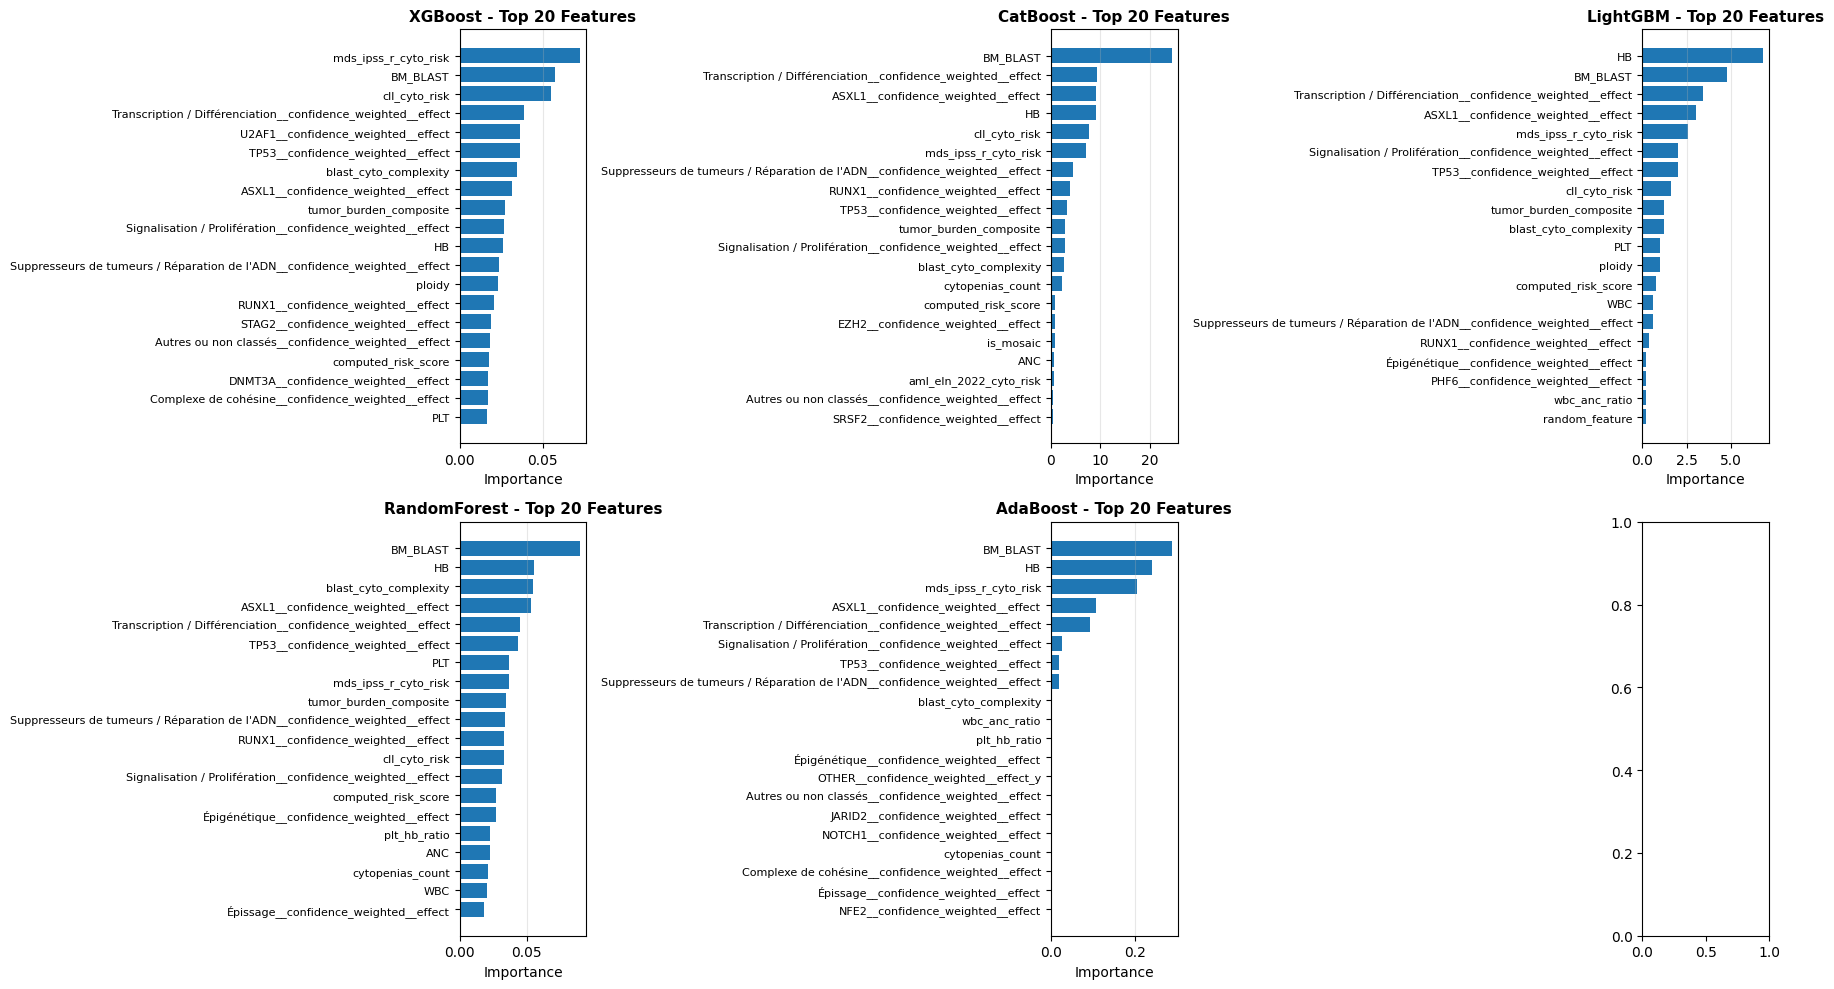


=== Top 10 features par modèle ===

XGBoost:
  1. mds_ipss_r_cyto_risk: 0.0727
  2. BM_BLAST: 0.0578
  3. cll_cyto_risk: 0.0552
  4. Transcription / Différenciation__confidence_weighted__effect: 0.0385
  5. U2AF1__confidence_weighted__effect: 0.0366
  6. TP53__confidence_weighted__effect: 0.0361
  7. blast_cyto_complexity: 0.0347
  8. ASXL1__confidence_weighted__effect: 0.0317
  9. tumor_burden_composite: 0.0273
  10. Signalisation / Prolifération__confidence_weighted__effect: 0.0265

CatBoost:
  1. BM_BLAST: 24.4469
  2. Transcription / Différenciation__confidence_weighted__effect: 9.3520
  3. ASXL1__confidence_weighted__effect: 9.1667
  4. HB: 9.1540
  5. cll_cyto_risk: 7.7572
  6. mds_ipss_r_cyto_risk: 7.0653
  7. Suppresseurs de tumeurs / Réparation de l'ADN__confidence_weighted__effect: 4.5354
  8. RUNX1__confidence_weighted__effect: 3.8647
  9. TP53__confidence_weighted__effect: 3.1551
  10. tumor_burden_composite: 2.8762

LightGBM:
  1. HB: 6.8000
  2. BM_BLAST: 4.8000
  3. Tra

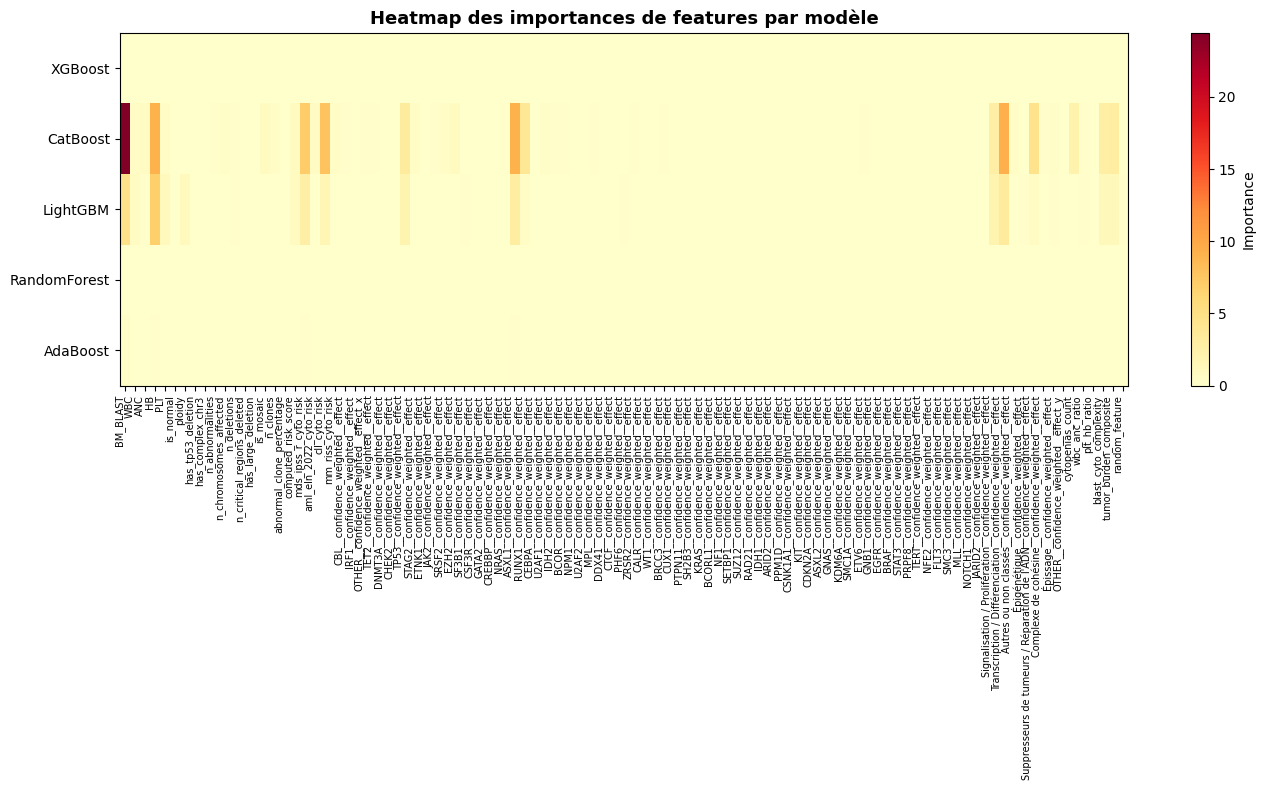

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuration
y = targets_preprocess['OS_STATUS'].values

drop_columns = ["ID", "CENTER"]
X = clinical_preprocess_train.drop(columns=drop_columns, errors='ignore').copy()
X.fillna(0, inplace=True)
feature_names = X.columns.tolist()

# Scale pour SVC
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

# Définition des modèles
models = [
    ('XGBoost', XGBClassifier(n_jobs=-1, random_state=42, verbosity=0, n_estimators=10, max_depth=5), False),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42, depth=5, l2_leaf_reg=3, iterations=10), False),
    ('LightGBM', LGBMClassifier(n_jobs=-1, random_state=42, verbose=-1, n_estimators=5, reg_alpha=0.1, reg_lambda=0.1, max_depth=3), False),
    ('RandomForest', RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=50, max_depth=5), False),
    ('AdaBoost', AdaBoostClassifier(random_state=42, n_estimators=5), False),
]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_results = {}
all_importances = {}

for name, model, needs_scaling in models:
    print(f"Training {name}...")
    aucs, accs = [], []
    importances_list = []
    
    for train_idx, val_idx in kfold.split(X, y):
        # Sélection des données
        if needs_scaling:
            X_tr, X_val = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
        else:
            X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]
        
        # Fit
        model.fit(X_tr, y_tr)
        
        # Metrics
        y_proba = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, y_proba))
        accs.append(accuracy_score(y_val, model.predict(X_val)))
        
        # Feature Importance
        if hasattr(model, 'feature_importances_'):
            # Modèles d'arbres
            imp = model.feature_importances_
            importances_list.append(imp)
        else:
            # Permutation importance pour SVC
            perm = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
            importances_list.append(perm.importances_mean)
    
    # Moyenne des importances sur les folds
    avg_importances = np.mean(importances_list, axis=0)
    all_importances[name] = avg_importances
    
    # Résultats
    all_results[name] = {
        'AUC': np.mean(aucs),
        'AUC_std': np.std(aucs),
        'Accuracy': np.mean(accs),
        'Accuracy_std': np.std(accs)
    }
    print(f"{name} - AUC: {np.mean(aucs):.4f} ± {np.std(aucs):.4f}, Acc: {np.mean(accs):.4f} ± {np.std(accs):.4f}")

# Affichage des résultats
print("\n=== Résumé des performances ===")
results_df = pd.DataFrame(all_results).T
print(results_df)

# Plot des importances de features
n_models = len(all_importances)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (name, importances) in enumerate(all_importances.items()):
    # Trier par importance
    sorted_idx = np.argsort(importances)[::-1][:20]  # Top 20 features
    sorted_importances = importances[sorted_idx]
    sorted_features = [feature_names[i] for i in sorted_idx]
    
    # Plot
    ax = axes[idx]
    ax.barh(range(len(sorted_importances)), sorted_importances)
    ax.set_yticks(range(len(sorted_importances)))
    ax.set_yticklabels(sorted_features, fontsize=8)
    ax.set_xlabel('Importance', fontsize=10)
    ax.set_title(f'{name} - Top 20 Features', fontsize=11, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot comparatif des top features communes
print("\n=== Top 10 features par modèle ===")
top_features_dict = {}
for name, importances in all_importances.items():
    sorted_idx = np.argsort(importances)[::-1][:10]
    top_features = [feature_names[i] for i in sorted_idx]
    top_features_dict[name] = top_features
    print(f"\n{name}:")
    for i, feat in enumerate(top_features, 1):
        print(f"  {i}. {feat}: {importances[sorted_idx[i-1]]:.4f}")

# Heatmap des importances
fig, ax = plt.subplots(figsize=(14, 8))
importance_matrix = np.array([all_importances[name] for name in all_importances.keys()])
im = ax.imshow(importance_matrix, aspect='auto', cmap='YlOrRd')

ax.set_yticks(range(len(all_importances)))
ax.set_yticklabels(list(all_importances.keys()))
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=90, ha='right', fontsize=7)
ax.set_title('Heatmap des importances de features par modèle', fontsize=13, fontweight='bold')

plt.colorbar(im, ax=ax, label='Importance')
plt.tight_layout()
plt.savefig('feature_importances_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Regression

Regression, sur les données qui ont deja connu un déces on va maintenant prédire le moment du deces, cela permet de classer les personnes qui ont déjà eu un probleme, on sépare ainsi un probleme avec information cahcé en deux probleme complet ce qui simplifie la tache

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
# from lifelines.utils import concordance_index
# import numpy as np
# import pandas as pd
# from scipy.stats import norm

# # Target: OS_YEARS
# y_raw = targets_preprocess['OS_YEARS'].values
# event = event_target.values

# def transform_y(y):
#     """Rank -> uniform score -> inverse CDF normale"""
#     n = len(y)
#     ranks = (-y).argsort().argsort() + 1  # Rank based on -time (higher rank = shorter survival)
#     uniform_scores = ranks / (n + 1)  # Avoid 0 and 1 for ppf stability
#     return norm.ppf(uniform_scores)  # Inverse CDF normale

# def inverse_transform_pred(pred):
#     """CDF normale -> uniform scores (for ranking comparison)"""
#     return norm.cdf(pred)

# # Prepare X
# X = clinical_preprocess_train.drop(columns=drop_columns, errors='ignore').copy()
# X = X.fillna(X.median())

# # Define models
# models = [
#     ('LinearRegression', LinearRegression()),
#     ('ElasticNet', ElasticNet(random_state=42, max_iter=5000)),
#     ('XGBoost', XGBRegressor(n_jobs=-1, random_state=42, verbosity=0)),
#     ('CatBoost', CatBoostRegressor(verbose=0, random_state=42)),
#     ('LightGBM', LGBMRegressor(n_jobs=-1, random_state=42, verbose=-1)),
#     ('RandomForest', RandomForestRegressor(n_jobs=-1, random_state=42)),
#     ('AdaBoost', AdaBoostRegressor(random_state=42)),
# ]

# # K-Fold CV
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# results = {}

# for name, model in models:
#     print(f"Training {name}...")
#     c_indices = []
#     for train_idx, val_idx in kfold.split(X):
#         X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_train_raw, y_val_raw = y_raw[train_idx], y_raw[val_idx]
#         event_val = event[val_idx]
        
#         # Transform y for training
#         y_train_transformed = transform_y(y_train_raw)
        
#         model.fit(X_train, y_train_transformed)
#         pred_transformed = model.predict(X_val)
        
#         # Apply CDF to get uniform scores (higher = shorter survival = higher risk)
#         pred_uniform = inverse_transform_pred(pred_transformed)
        
#         # C-index: higher pred_uniform should correspond to shorter survival
#         # We use -pred_uniform as risk score (or pred_uniform directly if ranking inversely)
#         c_idx = concordance_index(y_val_raw, -pred_uniform, event_val)
#         c_indices.append(c_idx)
    
#     results[name] = {'C-index': np.mean(c_indices), 'Std': np.std(c_indices)}
#     print(f"  -> {name} C-index: {np.mean(c_indices):.4f} (+/- {np.std(c_indices):.4f})")

# # Results
# pd.DataFrame(results).T.sort_values(by='C-index', ascending=False)

Training LinearRegression...
  -> LinearRegression C-index: 0.7019 (+/- 0.0135)
Training ElasticNet...
  -> ElasticNet C-index: 0.6635 (+/- 0.0143)
Training XGBoost...
  -> XGBoost C-index: 0.6601 (+/- 0.0166)
Training CatBoost...
  -> CatBoost C-index: 0.7013 (+/- 0.0145)
Training LightGBM...
  -> LightGBM C-index: 0.6878 (+/- 0.0053)
Training RandomForest...
  -> RandomForest C-index: 0.7030 (+/- 0.0116)
Training AdaBoost...
  -> AdaBoost C-index: 0.6750 (+/- 0.0214)


,C-index,Std
RandomForest,0.703029,0.011559
LinearRegression,0.701860,0.013501
CatBoost,0.701341,0.014532
LightGBM,0.687756,0.005253
AdaBoost,0.674987,0.021406
ElasticNet,0.663523,0.014278
XGBoost,0.660086,0.016644


# Ensemble optim avec optuna

In [ ]:
# import optuna
# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import roc_auc_score
# from sklearn.linear_model import LinearRegression, ElasticNet
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
# from sklearn.svm import SVC
# from xgboost import XGBClassifier, XGBRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor
# from lifelines.utils import concordance_index
# import numpy as np
# import pandas as pd

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# # Prepare X
# X = clinical_preprocess_train.drop(columns=['ID', 'CENTER'], errors='ignore').copy()
# for col in X.select_dtypes(include=['object']).columns:
#     X[col] = LabelEncoder().fit_transform(X[col].astype(str))
# X = X.fillna(X.median())

# y_raw = targets_preprocess['OS_YEARS'].values
# event = event_target.values
# y_class = event.astype(int)

# # ============ CLASSIFICATION MODELS ============
# clf_models = {
#     'XGB': XGBClassifier(n_jobs=-1, random_state=42, verbosity=0),
#     'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
#     'LGBM': LGBMClassifier(n_jobs=-1, random_state=42, verbose=-1),
#     'RF': RandomForestClassifier(n_jobs=-1, random_state=42),
#     'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME'),
# }

# # ============ REGRESSION MODELS ============
# def transform_y(y):
#     n = len(y)
#     ranks = (-y).argsort().argsort() + 1
#     return norm.ppf(ranks / (n + 1))

# reg_models = {
#     'LinReg': LinearRegression(),
#     'ElasticNet': ElasticNet(random_state=42, max_iter=5000),
#     'XGB': XGBRegressor(n_jobs=-1, random_state=42, verbosity=0),
#     'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
#     'LGBM': LGBMRegressor(n_jobs=-1, random_state=42, verbose=-1),
#     'RF': RandomForestRegressor(n_jobs=-1, random_state=42),
#     'AdaBoost': AdaBoostRegressor(random_state=42),
# }

# # ============ GET OOF PREDICTIONS ============
# def get_oof_preds_clf(models_dict, X, y, n_splits=5):
#     kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
#     oof = {name: np.zeros(len(y)) for name in models_dict}
#     for train_idx, val_idx in kf.split(X, y):
#         X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_tr = y[train_idx]
#         for name, model in models_dict.items():
#             m = model.__class__(**model.get_params())
#             m.fit(X_tr, y_tr)
#             oof[name][val_idx] = m.predict_proba(X_val)[:, 1]
#     return oof

# def get_oof_preds_reg(models_dict, X, y_raw, n_splits=5):
#     kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
#     oof = {name: np.zeros(len(y_raw)) for name in models_dict}
#     for train_idx, val_idx in kf.split(X):
#         X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_tr_transformed = transform_y(y_raw[train_idx])
#         for name, model in models_dict.items():
#             m = model.__class__(**model.get_params())
#             m.fit(X_tr, y_tr_transformed)
#             oof[name][val_idx] = m.predict(X_val)
#     return oof

# print("Getting OOF predictions for Classification...")
# oof_clf = get_oof_preds_clf(clf_models, X, y_class)

# print("Getting OOF predictions for Regression...")
# oof_reg = get_oof_preds_reg(reg_models, X, y_raw)

# # ============ OPTUNA BLEND OPTIMIZATION - CLASSIFICATION ============
# def objective_clf(trial):
#     weights = {name: trial.suggest_float(name, 0, 1) for name in oof_clf}
#     total = sum(weights.values())
#     blend = sum(oof_clf[name] * weights[name] / total for name in oof_clf)
#     return roc_auc_score(y_class, blend)

# print("\nOptimizing Classification Blend...")
# study_clf = optuna.create_study(direction='maximize')
# study_clf.optimize(objective_clf, n_trials=200, show_progress_bar=True)

# print(f"Best Classification AUC: {study_clf.best_value:.4f}")
# print(f"Best weights: {study_clf.best_params}")

# # ============ OPTUNA BLEND OPTIMIZATION - REGRESSION ============
# def objective_reg(trial):
#     weights = {name: trial.suggest_float(name, 0, 1) for name in oof_reg}
#     total = sum(weights.values())
#     blend = sum(oof_reg[name] * weights[name] / total for name in oof_reg)
#     pred_uniform = norm.cdf(blend)
#     return concordance_index(y_raw, -pred_uniform, event)

# print("\nOptimizing Regression Blend...")
# study_reg = optuna.create_study(direction='maximize')
# study_reg.optimize(objective_reg, n_trials=200, show_progress_bar=True)

# print(f"Best Regression C-index: {study_reg.best_value:.4f}")
# print(f"Best weights: {study_reg.best_params}")

# # ============ SUMMARY ============
# print("\n" + "="*50)
# print("CLASSIFICATION ENSEMBLE")
# print(f"  AUC: {study_clf.best_value:.4f}")
# for k, v in study_clf.best_params.items():
#     print(f"  {k}: {v:.3f}")

# print("\nREGRESSION ENSEMBLE")
# print(f"  C-index: {study_reg.best_value:.4f}")
# for k, v in study_reg.best_params.items():
#     print(f"  {k}: {v:.3f}")

# Final solution

On merge ensuite finalement les modèles ensembles pour obtenir un bon C index final selon la formule :

Risk = P(event = 0) * E[rank%|event = 0] + P(event = 1) * E[rank%| event = 1]

Cette formule nous dis :

Pour E[rank%| event = 1] on peut restreindre aux event = 1 ou on a un vrai classement,
Pour E[rank%| event = 0] o peut estimer les rangs parmis toutes les differentes positions puis 
se restreindre à ceux ci, en effet on a si T>T' et T' mort alors T mieux classer que T',
on a donc un ordre partiel dans nos données et on peut organiser de sorte a mettre entre les personne morte,
les personne encore en vie.

Une deuxieme approche est de faire du stacking en utilisant un meta modele, on peut aussi faire un nesemble entre le stacking et la meta modele

In [ ]:
# =============================================================================
# OPTUNA UTILS - Avec IPCW C-index au lieu de concordance_index simple
# =============================================================================

import optuna
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, mean_squared_error
from sksurv.metrics import concordance_index_ipcw
from scipy.stats import norm
import numpy as np
import pandas as pd

optuna.logging.set_verbosity(optuna.logging.WARNING)

# --- Configuration ---
N_FOLDS = 5
RANDOM_STATE = 42


# --- Cross-Validation Factories ---
def get_stratified_kfold(n_splits=N_FOLDS):
    """Retourne un StratifiedKFold pour les problèmes de classification."""
    return StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)


def get_kfold(n_splits=N_FOLDS):
    """Retourne un KFold standard pour les problèmes de régression."""
    return KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)


# --- Transformation de Y ---
def transform_y(y):
    """Transforme y via rank -> uniform -> inverse CDF normale."""
    n = len(y)
    ranks = (-y).argsort().argsort() + 1  # Rang basé sur -temps
    uniform_scores = ranks / (n + 1)
    return norm.ppf(uniform_scores)


def inverse_transform_pred(pred):
    """CDF normale pour obtenir des scores uniformes."""
    return norm.cdf(pred)


# --- Conversion vers format sksurv ---
def make_survival_array(time, event):
    """Crée un structured array pour sksurv: dtype=[('event', bool), ('time', float)]"""
    return np.array(
        [(bool(e), t) for e, t in zip(event, time)],
        dtype=[("event", bool), ("time", float)],
    )


# --- Métriques ---
def compute_bic(n, k, nll_or_mse, is_regression=True):
    """Calcule le BIC. Pour régression: log(MSE), pour classification: NLL."""
    if is_regression:
        if nll_or_mse <= 0:
            nll_or_mse = 1e-10
        return k * np.log(n) + n * np.log(nll_or_mse)
    else:
        return k * np.log(n) + 2 * nll_or_mse


def compute_aic(k, nll):
    """Calcule l'AIC pour classification."""
    return 2 * k + 2 * nll


def safe_ipcw_cindex(
    y_train_time, y_train_event, y_test_time, y_test_event, pred, tau=None
):
    """
    IPCW C-index avec gestion d'erreurs.

    Args:
        y_train_time: Temps de survie sur train (pour estimer la censure)
        y_train_event: Événements sur train
        y_test_time: Temps de survie sur test
        y_test_event: Événements sur test
        pred: Prédictions de risque (plus élevé = plus de risque = survie plus courte)
        tau: Temps de troncature (optionnel, par défaut max du test)

    Returns:
        C-index IPCW
    """
    try:
        # Convertir en format sksurv
        survival_train = make_survival_array(y_train_time, y_train_event)
        survival_test = make_survival_array(y_test_time, y_test_event)

        # Tau = temps max observé dans le test si non spécifié
        if tau is None:
            tau = y_test_time.max()

        # IPCW C-index: estimate est la 2ème valeur retournée
        c_idx, _, _, _, _ = concordance_index_ipcw(
            survival_train, survival_test, pred, tau=tau
        )
        return c_idx
    except Exception as e:
        print(f"IPCW error: {e}")
        return 0.5  # Fallback

def safe_concordance_index(y_true, pred, event):
    """C-index simple (lifelines) avec gestion d'erreurs."""
    from lifelines.utils import concordance_index

    try:
        return concordance_index(y_true, pred, event)
    except ZeroDivisionError:
        return 0.5


# --- Comptage des feuilles pour modèles à arbres ---
def count_total_leaves(model):
    """Compte le nombre total de feuilles d'un modèle à arbres."""
    model_type = type(model).__name__

    if "XGB" in model_type:
        try:
            df = model.get_booster().trees_to_dataframe()
            return (df["Feature"] == "Leaf").sum()
        except:
            n_trees = model.n_estimators
            max_depth = getattr(model, "max_depth", 6)
            return n_trees * (2**max_depth)

    elif "LGBM" in model_type:
        try:
            booster = model.booster_
            return sum(booster.num_leaves())
        except:
            return model.n_estimators * model.num_leaves

    elif "CatBoost" in model_type:
        try:
            tree_count = model.tree_count_
            depth = model.get_param("depth") or 6
            return tree_count * (2**depth)
        except:
            return model.get_param("iterations") * (2 ** model.get_param("depth"))

    elif "RandomForest" in model_type:
        try:
            return sum(tree.get_n_leaves() for tree in model.estimators_)
        except:
            return model.n_estimators * (2 ** getattr(model, "max_depth", 10))

    elif "AdaBoost" in model_type:
        try:
            return sum(est.get_n_leaves() for est in model.estimators_)
        except:
            return model.n_estimators * 2

    else:
        return 0


print("Optuna utils with IPCW C-index loaded successfully!")


# =============================================================================
# EXEMPLE D'UTILISATION DANS evaluate_model
# =============================================================================
"""
def evaluate_model(model, X, y_raw, event):
    kfold = get_kfold()
    c_indices, mses = [], []
    
    for train_idx, val_idx in kfold.split(X):
        X_tr, X_val = X.iloc[train_idx].values, X.iloc[val_idx].values
        y_tr_t = transform_y(y_raw[train_idx])
        
        try:
            model.fit(X_tr, y_tr_t)
            pred = model.predict(X_val)
            
            # Utiliser IPCW C-index au lieu de concordance_index
            # pred doit être un score de risque: plus élevé = survie plus courte
            risk_score = norm.cdf(pred)  # Transformer en [0,1], score de risque
            
            c_idx = safe_ipcw_cindex(
                y_train_time=y_raw[train_idx],
                y_train_event=event[train_idx],
                y_test_time=y_raw[val_idx],
                y_test_event=event[val_idx],
                pred=risk_score  # Plus élevé = plus de risque
            )
            c_indices.append(c_idx)
            mses.append(np.mean((pred - transform_y(y_raw[val_idx]))**2))
        except Exception as e:
            c_indices.append(0.5)
            mses.append(1.0)
            
    return np.mean(c_indices), np.mean(mses)
"""


Optuna utils with IPCW C-index loaded successfully!


c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\ndef evaluate_model(model, X, y_raw, event):\n    kfold = get_kfold()\n    c_indices, mses = [], []\n\n    for train_idx, val_idx in kfold.split(X):\n        X_tr, X_val = X.iloc[train_idx].values, X.iloc[val_idx].values\n        y_tr_t = transform_y(y_raw[train_idx])\n\n        try:\n            model.fit(X_tr, y_tr_t)\n            pred = model.predict(X_val)\n\n            # Utiliser IPCW C-index au lieu de concordance_index\n            # pred doit être un score de risque: plus élevé = survie plus courte\n            risk_score = norm.cdf(pred)  # Transformer en [0,1], score de risque\n\n            c_idx = safe_ipcw_cindex(\n                y_train_time=y_raw[train_idx],\n                y_train_event=event[train_idx],\n                y_test_time=y_raw[val_idx],\n                y_test_event=event[val_idx],\n                pred=risk_score  # Plus élevé = plus de risque\n            )\n            c_indices.append(c_idx)\n            mses.append(np.mean((pred - transform_y(y_raw

In [ ]:
# =============================================================================
# CELLULE: MODÈLES LINÉAIRES - Optimisation sur BIC
# =============================================================================
# Modèles: Ridge, Lasso, ElasticNet
# Objectif: Minimiser BIC = k * log(n) + n * log(MSE) pour régression
# CV: 5-fold
# =============================================================================

from sklearn.linear_model import Ridge, Lasso, ElasticNet

# --- Préparation des données ---
y_raw_linear = targets_preprocess["OS_YEARS"].values
event_linear = event_target.values
X_linear = (
    clinical_preprocess_train.drop(columns=drop_columns, errors="ignore")
    .copy()
    .fillna(0)
)
n_samples = len(y_raw_linear)


# --- Évaluation pour régression ---
def evaluate_linear_regression(model, X, y_raw, event):
    kfold = get_kfold()
    c_indices, mses = [], []

    for train_idx, val_idx in kfold.split(X):
        X_tr, X_val = X.iloc[train_idx].values, X.iloc[val_idx].values
        y_tr_transformed = transform_y(y_raw[train_idx])
        y_val_transformed = transform_y(y_raw[val_idx])

        try:
            model.fit(X_tr, y_tr_transformed)
            pred = model.predict(X_val)

            # MSE sur y transformé
            mse = mean_squared_error(y_val_transformed, pred)
            mses.append(mse)

            # C-index sur y original après retransformation
            pred_uniform = inverse_transform_pred(pred)
            c_idx = safe_concordance_index(
                y_raw[val_idx], -pred_uniform, event[val_idx]
            )
            c_indices.append(c_idx)
        except Exception as e:
            mses.append(1.0)
            c_indices.append(0.5)

    return np.mean(c_indices), np.mean(mses)


# --- Objectif Optuna ---
def make_linear_objective(model_name):
    def objective(trial):
        if model_name == "Ridge":
            model = Ridge(alpha=trial.suggest_float("alpha", 1e-4, 100, log=True))
            k = X_linear.shape[1]

        elif model_name == "Lasso":
            model = Lasso(
                alpha=trial.suggest_float("alpha", 1e-4, 10, log=True), max_iter=5000
            )
            k = X_linear.shape[1] // 2

        elif model_name == "ElasticNet":
            model = ElasticNet(
                alpha=trial.suggest_float("alpha", 1e-4, 10, log=True),
                l1_ratio=trial.suggest_float("l1_ratio", 0.1, 0.9),
                max_iter=5000,
            )
            k = X_linear.shape[1] // 2

        c_idx, mse = evaluate_linear_regression(model, X_linear, y_raw_linear, event_linear)
        bic = compute_bic(n_samples, k, mse, is_regression=True)
        
        trial.set_user_attr("C-index", c_idx)
        trial.set_user_attr("MSE", mse)
        trial.set_user_attr("BIC", bic)
        trial.set_user_attr("k", k)
        
        return bic

    return objective


# --- Exécution ---
linear_models = ["Ridge", "Lasso", "ElasticNet"]
best_linear_results = {}

print("=== RÉGRESSION (modèles linéaires) ===")
for model_name in linear_models:
    print(f"Optimizing {model_name}...")
    study = optuna.create_study(direction="minimize")
    study.optimize(
        make_linear_objective(model_name),
        n_trials=50,
        show_progress_bar=True,
    )

    best_linear_results[model_name] = {
        "BIC": study.best_value,
        "C-index": study.best_trial.user_attrs["C-index"],
        "MSE": study.best_trial.user_attrs["MSE"],
        "k": study.best_trial.user_attrs["k"],
        "params": dict(study.best_params),
    }
    print(
        f"  Best BIC: {study.best_value:.2f} | C-index: {study.best_trial.user_attrs['C-index']:.4f}"
    )

# --- Résumé ---
print("\n" + "=" * 60)
print("RÉSUMÉ MODÈLES LINÉAIRES")
print(pd.DataFrame(best_linear_results).T)

=== RÉGRESSION (modèles linéaires) ===
Optimizing Ridge...


  0%|          | 0/50 [00:00<?, ?it/s]

Best trial: 12. Best value: 436.106: 100%|██████████| 50/50 [00:09<00:00,  5.19it/s]


  Best BIC: 436.11 | C-index: 0.7180
Optimizing Lasso...


Best trial: 15. Best value: 14.6475:  38%|███▊      | 19/50 [00:06<00:10,  2.93it/s]


[W 2026-01-25 20:17:15,710] Trial 19 failed with parameters: {'alpha': 0.0002900360086597811} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\optuna\study\_optimize.py", line 206, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\enzo.cAo\AppData\Local\Temp\ipykernel_22980\4271222594.py", line 74, in objective
    c_idx, mse = evaluate_linear_regression(model, X_linear, y_raw_linear, event_linear)
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\enzo.cAo\AppData\Local\Temp\ipykernel_22980\4271222594.py", line 33, in evaluate_linear_regression
    model.fit(X_tr, y_tr_transformed)
    ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method

KeyboardInterrupt: 

In [ ]:

# %%
# =============================================================================
# CELLULE 3: MODÈLES À ARBRES - Optimisation avec régularisation sur |T|
# =============================================================================
# Modèles: XGBoost, CatBoost, LightGBM, RandomForest, AdaBoost
# Objectif: Minimiser (loss + alpha * |T|) où |T| = nombre total de feuilles
#           - Pour régression: loss = -C-index (on veut maximiser C-index)
#           - Pour classification: loss = -AUC
# CV: 5-fold (StratifiedKFold pour classification)
# =============================================================================

from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

# ===============================
# PARAMÈTRE DE RÉGULARISATION
# ===============================
ALPHA_TREE_REG = (
    0.0001  # Coefficient de régularisation sur |T| (à ajuster facilement ici)
)

RANDOM_STATE = 42

# --- Préparation des données ---
y_raw_tree = targets_preprocess["OS_YEARS"].values
event_tree = event_target.values
y_class_tree = event_tree.astype(int)
X_tree = (
    clinical_preprocess_train.drop(columns=drop_columns, errors="ignore")
    .copy()
    .fillna(0)
)


# --- Évaluation pour régression avec comptage des feuilles ---
def evaluate_tree_regression(model_class, params, X, y_raw, event):
    kfold = get_kfold()
    c_indices, total_leaves_list = [], []

    for train_idx, val_idx in kfold.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr_transformed = transform_y(y_raw[train_idx])

        try:
            model = model_class(**params)
            model.fit(X_tr, y_tr_transformed)
            pred = model.predict(X_val)

            # C-index sur y original après retransformation
            pred_uniform = inverse_transform_pred(pred)
            c_idx = safe_concordance_index(
                y_raw[val_idx], -pred_uniform, event[val_idx]
            )
            c_indices.append(c_idx)

            # Comptage des feuilles
            n_leaves = count_total_leaves(model)
            total_leaves_list.append(n_leaves)
        except Exception as e:
            c_indices.append(0.5)
            total_leaves_list.append(1000)

    return np.mean(c_indices), np.mean(total_leaves_list)


# --- Évaluation pour classification avec comptage des feuilles ---
def evaluate_tree_classification(model_class, params, X, y):
    kfold = get_stratified_kfold()
    aucs, total_leaves_list = [], []

    for train_idx, val_idx in kfold.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        try:
            model = model_class(**params)
            model.fit(X_tr, y_tr)
            y_proba = model.predict_proba(X_val)[:, 1]
            aucs.append(roc_auc_score(y_val, y_proba))

            n_leaves = count_total_leaves(model)
            total_leaves_list.append(n_leaves)
        except Exception as e:
            aucs.append(0.5)
            total_leaves_list.append(1000)

    return np.mean(aucs), np.mean(total_leaves_list)


# --- Factory pour les paramètres de chaque modèle ---
def suggest_tree_params(trial, model_name, is_classification=False):
    if "XGB" in model_name:
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 3, 12),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "n_jobs": -1,
            "verbosity": 0,
            "random_state": RANDOM_STATE,
        }
        model_class = XGBClassifier if is_classification else XGBRegressor

    elif "CatBoost" in model_name:
        params = {
            "iterations": trial.suggest_int("iterations", 10, 200),
            "depth": trial.suggest_int("depth", 4, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "verbose": 0,
            "random_state": RANDOM_STATE,
        }
        model_class = CatBoostClassifier if is_classification else CatBoostRegressor

    elif "LGBM" in model_name or "LightGBM" in model_name:
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "num_leaves": trial.suggest_int("num_leaves", 20, 150),
            "n_jobs": -1,
            "verbose": -1,
            "random_state": RANDOM_STATE,
        }
        model_class = LGBMClassifier if is_classification else LGBMRegressor

    elif "RandomForest" in model_name:
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 5, 30),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "n_jobs": -1,
            "random_state": RANDOM_STATE,
        }
        model_class = (
            RandomForestClassifier if is_classification else RandomForestRegressor
        )

    elif "AdaBoost" in model_name:
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 2.0, log=True),
            "random_state": RANDOM_STATE,
        }
        model_class = AdaBoostClassifier if is_classification else AdaBoostRegressor

    return model_class, params


# --- Objectif Optuna avec régularisation ---
def make_tree_objective(model_name, alpha=ALPHA_TREE_REG, is_classification=False):
    def objective(trial):
        model_class, params = suggest_tree_params(trial, model_name, is_classification)

        if is_classification:
            auc, n_leaves = evaluate_tree_classification(
                model_class, params, X_tree, y_class_tree
            )
            loss = -auc  # On veut maximiser AUC, donc minimiser -AUC
            trial.set_user_attr("AUC", auc)
        else:
            c_idx, n_leaves = evaluate_tree_regression(
                model_class, params, X_tree, y_raw_tree, event_tree
            )
            loss = -c_idx  # On veut maximiser C-index, donc minimiser -C-index
            trial.set_user_attr("C-index", c_idx)

        # Régularisation: loss + alpha * |T|
        regularized_loss = loss + alpha * n_leaves

        trial.set_user_attr("n_leaves", n_leaves)
        trial.set_user_attr("raw_loss", loss)
        trial.set_user_attr("regularized_loss", regularized_loss)

        return regularized_loss

    return objective


# --- Exécution ---
tree_models = ["XGBoost", "CatBoost", "LightGBM", "RandomForest", "AdaBoost"]

best_tree_results_reg = {}
best_tree_results_clf = {}

print(f"=== RÉGRESSION (modèles à arbres) | alpha={ALPHA_TREE_REG} ===")
for model_name in tree_models:
    print(f"Optimizing {model_name}...")
    study = optuna.create_study(direction="minimize")
    study.optimize(
        make_tree_objective(model_name, alpha=ALPHA_TREE_REG, is_classification=False),
        n_trials=50,
        show_progress_bar=True,
    )

    best_tree_results_reg[model_name] = {
        "C-index": study.best_trial.user_attrs["C-index"],
        "n_leaves": study.best_trial.user_attrs["n_leaves"],
        "reg_loss": study.best_value,
        "params": dict(study.best_params),
    }
    print(
        f"  C-index: {study.best_trial.user_attrs['C-index']:.4f} | "
        + f"Leaves: {study.best_trial.user_attrs['n_leaves']:.0f} | "
        + f"Reg.Loss: {study.best_value:.4f}"
    )

print(f"\n=== CLASSIFICATION (modèles à arbres) | alpha={ALPHA_TREE_REG} ===")
for model_name in tree_models:
    print(f"Optimizing {model_name}...")
    study = optuna.create_study(direction="minimize")
    study.optimize(
        make_tree_objective(model_name, alpha=ALPHA_TREE_REG, is_classification=True),
        n_trials=50,
        show_progress_bar=True,
    )

    best_tree_results_clf[model_name] = {
        "AUC": study.best_trial.user_attrs["AUC"],
        "n_leaves": study.best_trial.user_attrs["n_leaves"],
        "reg_loss": study.best_value,
        "params": dict(study.best_params),
    }
    print(
        f"  AUC: {study.best_trial.user_attrs['AUC']:.4f} | "
        + f"Leaves: {study.best_trial.user_attrs['n_leaves']:.0f} | "
        + f"Reg.Loss: {study.best_value:.4f}"
    )

# --- Résumé ---
print("\n" + "=" * 60)
print("RÉSUMÉ MODÈLES À ARBRES - RÉGRESSION")
print(pd.DataFrame(best_tree_results_reg).T[["C-index", "n_leaves", "reg_loss"]])

print("\nRÉSUMÉ MODÈLES À ARBRES - CLASSIFICATION")
print(pd.DataFrame(best_tree_results_clf).T[["AUC", "n_leaves", "reg_loss"]])



=== RÉGRESSION (modèles à arbres) | alpha=0.0001 ===
Optimizing XGBoost...


Best trial: 21. Best value: -0.704946: 100%|██████████| 50/50 [04:33<00:00,  5.48s/it]


  C-index: 0.7137 | Leaves: 87 | Reg.Loss: -0.7049
Optimizing CatBoost...


Best trial: 48. Best value: -0.6866: 100%|██████████| 50/50 [01:13<00:00,  1.47s/it]  


  C-index: 0.7154 | Leaves: 288 | Reg.Loss: -0.6866
Optimizing LightGBM...


Best trial: 44. Best value: -0.674963: 100%|██████████| 50/50 [03:27<00:00,  4.15s/it]


  C-index: 0.7010 | Leaves: 260 | Reg.Loss: -0.6750
Optimizing RandomForest...


Best trial: 32. Best value: -0.645781: 100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


  C-index: 0.7134 | Leaves: 676 | Reg.Loss: -0.6458
Optimizing AdaBoost...


Best trial: 45. Best value: -0.686771: 100%|██████████| 50/50 [02:20<00:00,  2.82s/it]


  C-index: 0.7011 | Leaves: 143 | Reg.Loss: -0.6868

=== CLASSIFICATION (modèles à arbres) | alpha=0.0001 ===
Optimizing XGBoost...


Best trial: 41. Best value: -0.69678: 100%|██████████| 50/50 [03:38<00:00,  4.36s/it] 


  AUC: 0.7156 | Leaves: 188 | Reg.Loss: -0.6968
Optimizing CatBoost...


Best trial: 13. Best value: -0.700076: 100%|██████████| 50/50 [01:27<00:00,  1.75s/it]


  AUC: 0.7177 | Leaves: 176 | Reg.Loss: -0.7001
Optimizing LightGBM...


Best trial: 11. Best value: -0.66968:  38%|███▊      | 19/50 [01:31<01:37,  3.14s/it] 

In [ ]:
# %%
# =============================================================================
# CELLULE: MODÈLES À ARBRES - Régression avec poids IPCW
# =============================================================================
# Modèles: XGBoost, CatBoost, LightGBM, RandomForest
# Objectif: Minimiser (loss + alpha * |T|) avec poids Kaplan-Meier IPCW
# Loss = MSE pondéré, évaluation = IPCW C-index
# =============================================================================

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sksurv.metrics import concordance_index_ipcw
import numpy as np
import pandas as pd
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

# ===============================
# PARAMÈTRES
# ===============================
ALPHA_TREE_REG = 0.0001
N_TRIALS = 50
N_FOLDS = 5
RANDOM_STATE = 42

# --- Préparation des données ---
y_raw = targets_preprocess["OS_YEARS"].values
event = event_target.values
X = clinical_preprocess_train.drop(columns=drop_columns, errors="ignore").copy().fillna(0)


# --- Utils ---
def transform_y(y):
    n = len(y)
    ranks = (-y).argsort().argsort() + 1
    return norm.ppf(ranks / (n + 1))

def inverse_transform_pred(pred):
    return norm.cdf(pred)

def make_survival_array(times, events):
    return np.array([(bool(e), t) for e, t in zip(events, times)],
                    dtype=[('event', bool), ('time', float)])

def compute_km_weights(times, events):
    """Calcule les poids IPCW Kaplan-Meier."""
    df = pd.DataFrame({'time': times, 'event': events})
    sorted_df = df.sort_values('time').reset_index(drop=True)
    sorted_df['_cens'] = 1 - sorted_df['event']
    
    stats = sorted_df.groupby('time').agg(n_cens=('_cens', 'sum'), n_tot=('_cens', 'count')).reset_index()
    n = len(sorted_df)
    stats['at_risk'] = n - stats['n_tot'].cumsum().shift(1, fill_value=0)
    stats['G_t'] = (1 - stats['n_cens'] / stats['at_risk'].clip(lower=1)).cumprod()
    stats['G_t_minus'] = stats['G_t'].shift(1, fill_value=1.0)
    
    result = df.merge(stats[['time', 'G_t_minus']], on='time', how='left')
    weights = np.zeros(len(df))
    mask = result['event'] == 1
    weights[mask] = 1.0 / result.loc[mask, 'G_t_minus'].clip(lower=1e-10)
    return weights

def safe_ipcw_cindex(times_train, events_train, times_test, events_test, risk_scores):
    try:
        surv_train = make_survival_array(times_train, events_train)
        surv_test = make_survival_array(times_test, events_test)
        tau = times_test.max()
        c_idx, _, _, _, _ = concordance_index_ipcw(surv_train, surv_test, risk_scores, tau=tau)
        return c_idx
    except:
        return 0.5

def count_total_leaves(model):
    model_type = type(model).__name__
    if "XGB" in model_type:
        try:
            df = model.get_booster().trees_to_dataframe()
            return (df["Feature"] == "Leaf").sum()
        except:
            return model.n_estimators * (2 ** getattr(model, "max_depth", 6))
    elif "LGBM" in model_type:
        try:
            return sum(model.booster_.num_leaves())
        except:
            return model.n_estimators * model.num_leaves
    elif "CatBoost" in model_type:
        try:
            return model.tree_count_ * (2 ** (model.get_param("depth") or 6))
        except:
            return model.get_param("iterations") * (2 ** model.get_param("depth"))
    elif "RandomForest" in model_type:
        try:
            return sum(t.get_n_leaves() for t in model.estimators_)
        except:
            return model.n_estimators * (2 ** getattr(model, "max_depth", 10))
    return 0


# --- Évaluation avec poids IPCW ---
def evaluate_tree_ipcw(model_class, params, X, y_raw, event):
    kfold = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    c_indices, mses, leaves_list = [], [], []
    
    for train_idx, val_idx in kfold.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        times_tr, times_val = y_raw[train_idx], y_raw[val_idx]
        events_tr, events_val = event[train_idx], event[val_idx]
        
        # Transformer y
        y_tr = transform_y(times_tr)
        
        # Poids IPCW
        weights = compute_km_weights(times_tr, events_tr)
        
        try:
            model = model_class(**params)
            
            # Fit avec poids
            if "CatBoost" in type(model).__name__:
                from catboost import Pool
                pool = Pool(X_tr, y_tr, weight=weights)
                model.fit(pool, verbose=0)
            elif hasattr(model, 'fit'):
                model.fit(X_tr, y_tr, sample_weight=weights)
            
            pred = model.predict(X_val)
            
            # MSE (sur transformé)
            y_val_t = transform_y(times_val)
            mse = mean_squared_error(y_val_t, pred)
            mses.append(mse)
            
            # IPCW C-index
            risk_scores = inverse_transform_pred(pred)
            c_idx = safe_ipcw_cindex(times_tr, events_tr, times_val, events_val, risk_scores)
            c_indices.append(c_idx)
            
            # Feuilles
            leaves_list.append(count_total_leaves(model))
        except Exception as e:
            print(f"Error: {e}")
            c_indices.append(0.5)
            mses.append(1.0)
            leaves_list.append(1000)
    
    return np.mean(c_indices), np.mean(mses), np.mean(leaves_list)


# --- Factory modèles ---
def get_tree_config(trial, model_name):
    if "XGB" in model_name:
        return XGBRegressor, {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 3, 12),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "n_jobs": -1, "verbosity": 0, "random_state": RANDOM_STATE
        }
    elif "CatBoost" in model_name:
        return CatBoostRegressor, {
            "iterations": trial.suggest_int("iterations", 10, 200),
            "depth": trial.suggest_int("depth", 4, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "verbose": 0, "random_state": RANDOM_STATE
        }
    elif "LGBM" in model_name:
        return LGBMRegressor, {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "num_leaves": trial.suggest_int("num_leaves", 20, 150),
            "n_jobs": -1, "verbose": -1, "random_state": RANDOM_STATE
        }
    elif "RandomForest" in model_name:
        return RandomForestRegressor, {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 5, 30),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "n_jobs": -1, "random_state": RANDOM_STATE
        }


# --- Objectif Optuna ---
def make_objective(model_name, alpha=ALPHA_TREE_REG):
    def objective(trial):
        model_class, params = get_tree_config(trial, model_name)
        c_idx, mse, n_leaves = evaluate_tree_ipcw(model_class, params, X, y_raw, event)
        
        # Régularisation: -C-index + alpha * |T|
        loss = -c_idx + alpha * n_leaves
        
        trial.set_user_attr("C-index", c_idx)
        trial.set_user_attr("MSE", mse)
        trial.set_user_attr("n_leaves", n_leaves)
        return loss
    return objective


# --- Exécution ---
tree_models = ["XGBoost", "CatBoost", "LGBM", "RandomForest"]
results = {}

print(f"=== RÉGRESSION AVEC POIDS IPCW | alpha={ALPHA_TREE_REG} ===")
for model_name in tree_models:
    print(f"\n🔄 Optimizing {model_name}...")
    study = optuna.create_study(direction="minimize")
    study.optimize(make_objective(model_name), n_trials=N_TRIALS, show_progress_bar=True)
    
    results[model_name] = {
        "IPCW_C-index": study.best_trial.user_attrs["C-index"],
        "MSE": study.best_trial.user_attrs["MSE"],
        "n_leaves": study.best_trial.user_attrs["n_leaves"],
        "reg_loss": study.best_value,
        "params": dict(study.best_params),
    }
    print(f"  IPCW C-index: {results[model_name]['IPCW_C-index']:.4f} | "
          f"Leaves: {results[model_name]['n_leaves']:.0f}")

# --- Résumé ---
print("\n" + "=" * 60)
print("RÉSUMÉ - RÉGRESSION AVEC POIDS IPCW")
summary = pd.DataFrame(results).T[["IPCW_C-index", "MSE", "n_leaves", "reg_loss"]]
print(summary.sort_values("IPCW_C-index", ascending=False))

=== RÉGRESSION AVEC POIDS IPCW | alpha=0.0001 ===

🔄 Optimizing XGBoost...


Best trial: 42. Best value: -0.667686: 100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


  IPCW C-index: 0.6835 | Leaves: 159

🔄 Optimizing CatBoost...


Best trial: 21. Best value: -0.615181: 100%|██████████| 50/50 [04:49<00:00,  5.79s/it] 


  IPCW C-index: 0.6504 | Leaves: 352

🔄 Optimizing LGBM...


Best trial: 41. Best value: -0.627882: 100%|██████████| 50/50 [02:52<00:00,  3.44s/it]


  IPCW C-index: 0.6639 | Leaves: 360

🔄 Optimizing RandomForest...


Best trial: 11. Best value: -0.63802: 100%|██████████| 50/50 [01:55<00:00,  2.31s/it]

  IPCW C-index: 0.6686 | Leaves: 305

RÉSUMÉ - RÉGRESSION AVEC POIDS IPCW
             IPCW_C-index       MSE n_leaves  reg_loss
XGBoost          0.683546  1.059204    158.6 -0.667686
RandomForest      0.66856  1.000895    305.4  -0.63802
LGBM             0.663882  1.164194    360.0 -0.627882
CatBoost         0.650381  1.304112    352.0 -0.615181


In [ ]:
# %%
# =============================================================================
# META-MODÈLE DE SURVIE - Version complète
# =============================================================================
# Modèles de base:
#   1. Classification: P(event=1)
#   2. Régression event=1: E[rank|event=1] - entraîné sur événements seulement
#   3. Régression event=0: E[rank|event=0] - entraîné sur censures seulement
#   4. Régression IPCW: E[rank|IPCW] - entraîné sur tout avec poids IPCW
#
# Méta-modèle: XGBoost avec optimisation Optuna
# =============================================================================

from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import norm
from sksurv.metrics import concordance_index_ipcw
import numpy as np
import pandas as pd
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

# --- Configuration ---
N_FOLDS = 5
RANDOM_STATE = 42
N_TRIALS_META = 30

# --- Données ---
y_times = targets_preprocess["OS_YEARS"].values
events = event_target.values
X_base = clinical_preprocess_train.drop(columns=drop_columns, errors="ignore").copy().fillna(0)


# --- Utils ---
def transform_y(y):
    n = len(y)
    ranks = (-y).argsort().argsort() + 1
    return norm.ppf(ranks / (n + 1))

def compute_km_weights(times, events):
    df = pd.DataFrame({'time': times, 'event': events})
    sorted_df = df.sort_values('time').reset_index(drop=True)
    sorted_df['_cens'] = 1 - sorted_df['event']
    stats = sorted_df.groupby('time').agg(n_cens=('_cens', 'sum'), n_tot=('_cens', 'count')).reset_index()
    n = len(sorted_df)
    stats['at_risk'] = n - stats['n_tot'].cumsum().shift(1, fill_value=0)
    stats['G_t'] = (1 - stats['n_cens'] / stats['at_risk'].clip(lower=1)).cumprod()
    stats['G_t_minus'] = stats['G_t'].shift(1, fill_value=1.0)
    result = df.merge(stats[['time', 'G_t_minus']], on='time', how='left')
    weights = np.zeros(len(df))
    mask = result['event'] == 1
    weights[mask] = 1.0 / result.loc[mask, 'G_t_minus'].clip(lower=1e-10)
    return weights

def make_survival_array(times, events):
    return np.array([(bool(e), t) for e, t in zip(events, times)],
                    dtype=[('event', bool), ('time', float)])

def safe_ipcw_cindex(times_train, events_train, times_test, events_test, risk_scores):
    try:
        surv_train = make_survival_array(times_train, events_train)
        surv_test = make_survival_array(times_test, events_test)
        c_idx, _, _, _, _ = concordance_index_ipcw(surv_train, surv_test, risk_scores, tau=times_test.max())
        return c_idx
    except:
        return 0.5


# =============================================================================
# ÉTAPE 1: ENTRAÎNER LES MODÈLES DE BASE
# =============================================================================

def train_base_models(X, y_times, events):
    """
    Modèles de base:
        - P(event=1): classificateurs
        - E[rank|event=1]: régresseurs sur event=1 seulement
        - E[rank|event=0]: régresseurs sur event=0 seulement
        - E[rank|IPCW]: régresseurs avec poids IPCW sur tout
    """
    n = len(y_times)
    
    oof_proba = np.zeros(n)
    oof_rank_event1 = np.zeros(n)
    oof_rank_event0 = np.zeros(n)
    oof_rank_ipcw = np.zeros(n)
    
    all_models = {'clf': [], 'reg_e1': [], 'reg_e0': [], 'reg_ipcw': []}
    
    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    
    print("=" * 60)
    print("ÉTAPE 1: Entraînement des modèles de base")
    print("=" * 60)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, events)):
        print(f"\n--- Fold {fold + 1}/{N_FOLDS} ---")
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        times_train, times_val = y_times[train_idx], y_times[val_idx]
        events_train, events_val = events[train_idx], events[val_idx]
        y_train_t = transform_y(times_train)
        
        # ----- 1. CLASSIFICATION: P(event=1) -----
        clf_models = []
        clf_preds = []
        
        for model in [
            XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                         random_state=RANDOM_STATE, verbosity=0, n_jobs=-1),
            LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1,
                          random_state=RANDOM_STATE, verbose=-1, n_jobs=-1),
        ]:
            model.fit(X_train, events_train)
            clf_preds.append(model.predict_proba(X_val)[:, 1])
            clf_models.append(model)
        
        oof_proba[val_idx] = np.mean(clf_preds, axis=0)
        all_models['clf'].append(clf_models)
        
        # ----- 2. RÉGRESSION EVENT=1: E[rank|event=1] -----
        e1_mask = events_train == 1
        X_e1 = X_train.iloc[e1_mask.nonzero()[0]]
        y_e1 = y_train_t[e1_mask]
        
        reg_e1_models = []
        reg_e1_preds = []
        
        if len(X_e1) > 10:
            for model in [
                XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                            random_state=RANDOM_STATE, verbosity=0, n_jobs=-1),
                LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                             random_state=RANDOM_STATE, verbose=-1, n_jobs=-1),
            ]:
                model.fit(X_e1, y_e1)
                reg_e1_preds.append(model.predict(X_val))
                reg_e1_models.append(model)
            oof_rank_event1[val_idx] = np.mean(reg_e1_preds, axis=0)
        
        all_models['reg_e1'].append(reg_e1_models)
        
        # ----- 3. RÉGRESSION EVENT=0: E[rank|event=0] -----
        e0_mask = events_train == 0
        X_e0 = X_train.iloc[e0_mask.nonzero()[0]]
        y_e0 = y_train_t[e0_mask]
        
        reg_e0_models = []
        reg_e0_preds = []
        
        if len(X_e0) > 10:
            for model in [
                XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                            random_state=RANDOM_STATE, verbosity=0, n_jobs=-1),
                LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                             random_state=RANDOM_STATE, verbose=-1, n_jobs=-1),
            ]:
                model.fit(X_e0, y_e0)
                reg_e0_preds.append(model.predict(X_val))
                reg_e0_models.append(model)
            oof_rank_event0[val_idx] = np.mean(reg_e0_preds, axis=0)
        
        all_models['reg_e0'].append(reg_e0_models)
        
        # ----- 4. RÉGRESSION IPCW: E[rank|IPCW] -----
        ipcw_weights = compute_km_weights(times_train, events_train)
        
        reg_ipcw_models = []
        reg_ipcw_preds = []
        
        for model in [
            XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                        random_state=RANDOM_STATE, verbosity=0, n_jobs=-1),
            LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                         random_state=RANDOM_STATE, verbose=-1, n_jobs=-1),
        ]:
            model.fit(X_train, y_train_t, sample_weight=ipcw_weights)
            reg_ipcw_preds.append(model.predict(X_val))
            reg_ipcw_models.append(model)
        
        oof_rank_ipcw[val_idx] = np.mean(reg_ipcw_preds, axis=0)
        all_models['reg_ipcw'].append(reg_ipcw_models)
        
        print(f"  P(e=1)={oof_proba[val_idx].mean():.3f}, "
              f"E[r|e=1]={oof_rank_event1[val_idx].mean():.3f}, "
              f"E[r|e=0]={oof_rank_event0[val_idx].mean():.3f}, "
              f"E[r|IPCW]={oof_rank_ipcw[val_idx].mean():.3f}")
    
    return oof_proba, oof_rank_event1, oof_rank_event0, oof_rank_ipcw, all_models


# =============================================================================
# ÉTAPE 2: CRÉER LES MÉTA-FEATURES
# =============================================================================

def create_meta_features(X, oof_proba, oof_rank_e1, oof_rank_e0, oof_rank_ipcw, poly_degree=2):
    """
    Méta-features = X original + prédictions + polynomiales
    """
    meta_df = X.copy()
    
    # Prédictions de base
    meta_df['prob_event1'] = oof_proba
    meta_df['prob_event0'] = 1 - oof_proba
    meta_df['rank_given_event1'] = oof_rank_e1
    meta_df['rank_given_event0'] = oof_rank_e0
    meta_df['rank_ipcw'] = oof_rank_ipcw
    
    # Risque estimé
    meta_df['risk_estimate'] = (
        oof_proba * oof_rank_e1 + 
        (1 - oof_proba) * oof_rank_e0
    )
    
    # Features polynomiales
    pred_feats = np.column_stack([oof_proba, oof_rank_e1, oof_rank_e0, oof_rank_ipcw])
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    poly_feats = poly.fit_transform(pred_feats)
    
    for i in range(poly_feats.shape[1]):
        meta_df[f'poly_{i}'] = poly_feats[:, i]
    
    print(f"\nMéta-features: {meta_df.shape[1]} colonnes")
    return meta_df


# =============================================================================
# ÉTAPE 3: MÉTA-MODÈLE AVEC OPTUNA
# =============================================================================

def train_meta_model_optuna(X_meta, y_times, events):
    """
    Optimise et entraîne le méta-modèle XGBoost avec Optuna.
    """
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 10, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 10, log=True),
            'random_state': RANDOM_STATE,
            'verbosity': 0,
            'n_jobs': -1
        }
        
        c_indices = []
        
        for train_idx, val_idx in kf.split(X_meta):
            X_train, X_val = X_meta.iloc[train_idx], X_meta.iloc[val_idx]
            times_train, times_val = y_times[train_idx], y_times[val_idx]
            events_train, events_val = events[train_idx], events[val_idx]
            
            y_train = transform_y(times_train)
            ipcw_weights = compute_km_weights(times_train, events_train)
            
            model = XGBRegressor(**params)
            model.fit(X_train, y_train, sample_weight=ipcw_weights)
            
            pred = model.predict(X_val)
            risk_scores = norm.cdf(pred)
            
            c_idx = safe_ipcw_cindex(times_train, events_train, times_val, events_val, risk_scores)
            c_indices.append(c_idx)
        
        mean_c_idx = np.mean(c_indices)
        trial.set_user_attr('c_indices', c_indices)
        return -mean_c_idx  # Minimiser -C-index = Maximiser C-index
    
    print("\n" + "=" * 60)
    print("ÉTAPE 3: Optimisation Optuna du méta-modèle")
    print("=" * 60)
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=N_TRIALS_META, show_progress_bar=True)
    
    best_params = study.best_params
    best_c_idx = -study.best_value
    
    print(f"\n📊 Meilleurs paramètres:")
    for k, v in best_params.items():
        print(f"  {k}: {v}")
    print(f"\n🏆 Meilleur IPCW C-index: {best_c_idx:.4f}")
    
    # Entraîner les modèles finaux avec les meilleurs params
    print("\n🔄 Entraînement des modèles finaux...")
    
    oof_risk = np.zeros(len(y_times))
    final_models = []
    final_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_meta)):
        X_train, X_val = X_meta.iloc[train_idx], X_meta.iloc[val_idx]
        times_train, times_val = y_times[train_idx], y_times[val_idx]
        events_train, events_val = events[train_idx], events[val_idx]
        
        y_train = transform_y(times_train)
        ipcw_weights = compute_km_weights(times_train, events_train)
        
        model = XGBRegressor(**best_params, random_state=RANDOM_STATE, verbosity=0, n_jobs=-1)
        model.fit(X_train, y_train, sample_weight=ipcw_weights)
        
        pred = model.predict(X_val)
        risk_scores = norm.cdf(pred)
        oof_risk[val_idx] = risk_scores
        
        c_idx = safe_ipcw_cindex(times_train, events_train, times_val, events_val, risk_scores)
        final_scores.append(c_idx)
        final_models.append(model)
        
        print(f"  Fold {fold+1}: IPCW C-index = {c_idx:.4f}")
    
    print(f"\n{'=' * 60}")
    print(f"RÉSULTAT FINAL: {np.mean(final_scores):.4f} ± {np.std(final_scores):.4f}")
    print(f"{'=' * 60}")
    
    return oof_risk, final_models, final_scores, best_params


# =============================================================================
# EXÉCUTION
# =============================================================================

# Étape 1
oof_proba, oof_rank_e1, oof_rank_e0, oof_rank_ipcw, base_models = train_base_models(X_base, y_times, events)

# Étape 2
X_meta = create_meta_features(X_base, oof_proba, oof_rank_e1, oof_rank_e0, oof_rank_ipcw)

# Étape 3
oof_risk, meta_models, meta_scores, best_meta_params = train_meta_model_optuna(X_meta, y_times, events)

print("\n" + "=" * 60)
print("PIPELINE TERMINÉ")
print("=" * 60)

ÉTAPE 1: Entraînement des modèles de base

--- Fold 1/5 ---
  P(e=1)=0.525, E[r|e=1]=-0.082, E[r|e=0]=0.018, E[r|IPCW]=-0.215

--- Fold 2/5 ---
  P(e=1)=0.498, E[r|e=1]=-0.035, E[r|e=0]=-0.013, E[r|IPCW]=-0.175

--- Fold 3/5 ---
  P(e=1)=0.488, E[r|e=1]=-0.045, E[r|e=0]=-0.044, E[r|IPCW]=-0.211

--- Fold 4/5 ---
  P(e=1)=0.520, E[r|e=1]=-0.038, E[r|e=0]=-0.011, E[r|IPCW]=-0.182

--- Fold 5/5 ---
  P(e=1)=0.513, E[r|e=1]=-0.041, E[r|e=0]=-0.022, E[r|IPCW]=-0.170

Méta-features: 119 colonnes

ÉTAPE 3: Optimisation Optuna du méta-modèle


Best trial: 13. Best value: -0.687908: 100%|██████████| 30/30 [03:29<00:00,  6.98s/it]



📊 Meilleurs paramètres:
  n_estimators: 123
  max_depth: 3
  learning_rate: 0.010001676543018331
  subsample: 0.715396478890744
  colsample_bytree: 0.8783900314905458
  min_child_weight: 6
  reg_alpha: 0.0001283795782764255
  reg_lambda: 0.0008650474781299032

🏆 Meilleur IPCW C-index: 0.6879

🔄 Entraînement des modèles finaux...
  Fold 1: IPCW C-index = 0.6976
  Fold 2: IPCW C-index = 0.6447
  Fold 3: IPCW C-index = 0.7024
  Fold 4: IPCW C-index = 0.6842
  Fold 5: IPCW C-index = 0.7106

RÉSULTAT FINAL: 0.6879 ± 0.0232

PIPELINE TERMINÉ


In [ ]:
# %%
# =============================================================================
# MÉTA-MODÈLE: Formule de rang avec optimisation Optuna
# =============================================================================
# Rang = P(e=0) * S/2 * E[rank%|e=0] + P(e=1) * (S + (1-S) * E[rank|e=1]) + w_ipcw * E[IPCW]
#
# Où:
#   S = proportion de survivants (event=0) dans le dataset
#   E[rank%|e=0] = modèle entraîné sur event=0 seulement
#   E[rank|e=1] = modèle entraîné sur event=1 seulement
#   E[IPCW] = modèle entraîné avec poids IPCW (bonus optionnel)
# =============================================================================

import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import KFold
from sksurv.metrics import concordance_index_ipcw

optuna.logging.set_verbosity(optuna.logging.WARNING)

N_FOLDS = 5
N_TRIALS = 100
RANDOM_STATE = 42


def make_survival_array(times, events):
    return np.array([(bool(e), t) for e, t in zip(events, times)],
                    dtype=[('event', bool), ('time', float)])


def safe_ipcw_cindex(times_train, events_train, times_test, events_test, risk_scores):
    try:
        surv_train = make_survival_array(times_train, events_train)
        surv_test = make_survival_array(times_test, events_test)
        c_idx, _, _, _, _ = concordance_index_ipcw(surv_train, surv_test, risk_scores, tau=times_test.max())
        return c_idx
    except:
        return 0.5


def compute_risk_formula(prob_e1, rank_e0, rank_e1, rank_ipcw, S, w_ipcw=0.0):
    """
    Calcule le rang selon la formule:
    
    Rang = P(e=0) * (S/2) * E[rank%|e=0] + P(e=1) * (S + (1-S) * E[rank|e=1]) + w_ipcw * E[IPCW]
    
    Args:
        prob_e1: P(event=1) - prédictions du classifieur
        rank_e0: E[rank%|event=0] - modèle entraîné sur event=0
        rank_e1: E[rank|event=1] - modèle entraîné sur event=1
        rank_ipcw: E[IPCW] - modèle avec poids IPCW
        S: Proportion de survivants (event=0)
        w_ipcw: Poids pour E[IPCW]
    """
    prob_e0 = 1 - prob_e1
    
    # Terme pour event=0: P(e=0) * (S/2) * E[rank%|e=0]
    term_e0 = prob_e0 * (S / 2) * rank_e0
    
    # Terme pour event=1: P(e=1) * (S + (1-S) * E[rank|e=1])
    term_e1 = prob_e1 * (S + (1 - S) * rank_e1)
    
    # Terme IPCW bonus
    term_ipcw = w_ipcw * rank_ipcw
    
    risk = term_e0 + term_e1 + term_ipcw
    
    # Normaliser en rang
    risk_ranked = pd.Series(risk).rank() / len(risk)
    
    return risk_ranked.values


def optimize_risk_formula(oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw,
                          y_times, events, n_trials=N_TRIALS):
    """
    Optimise le poids de IPCW et éventuellement d'autres paramètres.
    """
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    
    # S = proportion globale de survivants
    S = (events == 0).mean()
    print(f"Proportion de survivants S = {S:.4f}")
    
    # Normaliser les prédictions en 0~1
    def scale_01(x):
        return (x - x.min()) / (x.max() - x.min() + 1e-10)
    
    proba_scaled = oof_proba  # Déjà en probabilité 0-1
    rank_e0_scaled = scale_01(oof_rank_e0)
    rank_e1_scaled = scale_01(oof_rank_e1)
    rank_ipcw_scaled = scale_01(oof_rank_ipcw)
    
    def objective(trial):
        # Poids pour IPCW (le reste est fixé par la formule)
        w_ipcw = trial.suggest_float('w_ipcw', 0.0, 0.5)
        
        # Optionnellement ajuster S
        S_adj = trial.suggest_float('S_adj', 0.8, 1.2)  # Multiplicateur de S
        S_used = S * S_adj
        
        c_indices = []
        
        for train_idx, val_idx in kf.split(proba_scaled):
            times_train, times_val = y_times[train_idx], y_times[val_idx]
            events_train, events_val = events[train_idx], events[val_idx]
            
            risk_scores = compute_risk_formula(
                proba_scaled[val_idx],
                rank_e0_scaled[val_idx],
                rank_e1_scaled[val_idx],
                rank_ipcw_scaled[val_idx],
                S=S_used,
                w_ipcw=w_ipcw
            )
            
            c_idx = safe_ipcw_cindex(times_train, events_train, times_val, events_val, risk_scores)
            c_indices.append(c_idx)
        
        return -np.mean(c_indices)
    
    print("=" * 60)
    print("OPTIMISATION DE LA FORMULE DE RANG")
    print("=" * 60)
    print(f"Formule: Rang = P(e=0) * S/2 * E[r|e=0] + P(e=1) * (S + (1-S) * E[r|e=1]) + w * E[IPCW]")
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    best_params = study.best_params
    best_c_idx = -study.best_value
    
    print(f"\n📊 Meilleurs paramètres:")
    print(f"  w_ipcw: {best_params['w_ipcw']:.4f}")
    print(f"  S_adj: {best_params['S_adj']:.4f}")
    print(f"  S utilisé: {S * best_params['S_adj']:.4f}")
    print(f"\n🏆 Meilleur IPCW C-index: {best_c_idx:.4f}")
    
    return best_params, S, best_c_idx, study


def apply_final_risk_formula(oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw, params, S):
    """
    Applique la formule finale avec les paramètres optimisés.
    """
    def scale_01(x):
        return (x - x.min()) / (x.max() - x.min() + 1e-10)
    
    S_used = S * params['S_adj']
    
    final_risk = compute_risk_formula(
        oof_proba,
        scale_01(oof_rank_e0),
        scale_01(oof_rank_e1),
        scale_01(oof_rank_ipcw),
        S=S_used,
        w_ipcw=params['w_ipcw']
    )
    
    return final_risk


# =============================================================================
# EXÉCUTION
# =============================================================================

# Supposant oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw calculés
best_params, S, best_score, study = optimize_risk_formula(
    oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw,
    y_times, events, n_trials=N_TRIALS
)

# Appliquer la formule finale
final_risk = apply_final_risk_formula(oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw, best_params, S)

print(f"\n✅ Risque final: shape={final_risk.shape}")

Proportion de survivants S = 0.4957
OPTIMISATION DE LA FORMULE DE RANG
Formule: Rang = P(e=0) * S/2 * E[r|e=0] + P(e=1) * (S + (1-S) * E[r|e=1]) + w * E[IPCW]


Best trial: 52. Best value: -0.694572: 100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


📊 Meilleurs paramètres:
  w_ipcw: 0.4993
  S_adj: 0.8165
  S utilisé: 0.4048

🏆 Meilleur IPCW C-index: 0.6946

✅ Risque final: shape=(3173,)


In [ ]:
# %%
# =============================================================================
# MODÈLES DE BASE - Ensembles optimisés avec Optuna
# =============================================================================
# Classification: XGBoost, LightGBM, CatBoost, RandomForest, LogisticRegression
# Régression E[r|e=1]: XGBoost, LightGBM, CatBoost, Ridge, ElasticNet
# Régression E[r|e=0]: XGBoost, LightGBM, CatBoost, Ridge, ElasticNet
# Régression IPCW: XGBoost, LightGBM, CatBoost (avec poids KM)
# =============================================================================

from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, mean_squared_error
from scipy.stats import norm
from sksurv.metrics import concordance_index_ipcw
import numpy as np
import pandas as pd
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

# --- Configuration ---
N_FOLDS = 5
N_TRIALS_BASE = 30  # Trials par modèle de base
RANDOM_STATE = 42

# --- Données ---
y_times = targets_preprocess["OS_YEARS"].values
events = event_target.values
X_base = clinical_preprocess_train.drop(columns=drop_columns, errors="ignore").copy().fillna(0)


# --- Utils ---
def transform_y(y):
    n = len(y)
    ranks = (-y).argsort().argsort() + 1
    return norm.ppf(ranks / (n + 1))

def compute_km_weights(times, events):
    df = pd.DataFrame({'time': times, 'event': events})
    sorted_df = df.sort_values('time').reset_index(drop=True)
    sorted_df['_cens'] = 1 - sorted_df['event']
    stats = sorted_df.groupby('time').agg(n_cens=('_cens', 'sum'), n_tot=('_cens', 'count')).reset_index()
    n = len(sorted_df)
    stats['at_risk'] = n - stats['n_tot'].cumsum().shift(1, fill_value=0)
    stats['G_t'] = (1 - stats['n_cens'] / stats['at_risk'].clip(lower=1)).cumprod()
    stats['G_t_minus'] = stats['G_t'].shift(1, fill_value=1.0)
    result = df.merge(stats[['time', 'G_t_minus']], on='time', how='left')
    weights = np.zeros(len(df))
    mask = result['event'] == 1
    weights[mask] = 1.0 / result.loc[mask, 'G_t_minus'].clip(lower=1e-10)
    return weights

def make_survival_array(times, events):
    return np.array([(bool(e), t) for e, t in zip(events, times)],
                    dtype=[('event', bool), ('time', float)])

def safe_ipcw_cindex(times_train, events_train, times_test, events_test, risk_scores):
    try:
        surv_train = make_survival_array(times_train, events_train)
        surv_test = make_survival_array(times_test, events_test)
        c_idx, _, _, _, _ = concordance_index_ipcw(surv_train, surv_test, risk_scores, tau=times_test.max())
        return c_idx
    except:
        return 0.5


# =============================================================================
# FACTORIES POUR LES MODÈLES
# =============================================================================

def get_classifier(trial, model_name):
    """Factory pour les classifieurs avec hyperparamètres Optuna."""
    if model_name == "XGB":
        return XGBClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 3, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            subsample=trial.suggest_float('subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
            random_state=RANDOM_STATE, verbosity=0, n_jobs=-1
        )
    elif model_name == "LGBM":
        return LGBMClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 3, 12),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            num_leaves=trial.suggest_int('num_leaves', 20, 150),
            random_state=RANDOM_STATE, verbose=-1, n_jobs=-1
        )
    elif model_name == "CatBoost":
        return CatBoostClassifier(
            iterations=trial.suggest_int('iterations', 50, 300),
            depth=trial.suggest_int('depth', 4, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            random_state=RANDOM_STATE, verbose=0
        )
    elif model_name == "RF":
        return RandomForestClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 5, 20),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
            random_state=RANDOM_STATE, n_jobs=-1
        )
    elif model_name == "LR":
        return LogisticRegression(
            C=trial.suggest_float('C', 1e-4, 100, log=True),
            max_iter=1000, random_state=RANDOM_STATE
        )


def get_regressor(trial, model_name):
    """Factory pour les régresseurs avec hyperparamètres Optuna."""
    if model_name == "XGB":
        return XGBRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 3, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            subsample=trial.suggest_float('subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
            random_state=RANDOM_STATE, verbosity=0, n_jobs=-1
        )
    elif model_name == "LGBM":
        return LGBMRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 3, 12),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            num_leaves=trial.suggest_int('num_leaves', 20, 150),
            random_state=RANDOM_STATE, verbose=-1, n_jobs=-1
        )
    elif model_name == "CatBoost":
        return CatBoostRegressor(
            iterations=trial.suggest_int('iterations', 50, 300),
            depth=trial.suggest_int('depth', 4, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            random_state=RANDOM_STATE, verbose=0
        )
    elif model_name == "RF":
        return RandomForestRegressor(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 5, 20),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
            random_state=RANDOM_STATE, n_jobs=-1
        )
    elif model_name == "Ridge":
        return Ridge(alpha=trial.suggest_float('alpha', 1e-4, 100, log=True))
    elif model_name == "ElasticNet":
        return ElasticNet(
            alpha=trial.suggest_float('alpha', 1e-4, 10, log=True),
            l1_ratio=trial.suggest_float('l1_ratio', 0.1, 0.9),
            max_iter=5000
        )


# =============================================================================
# OPTIMISATION ET ENTRAÎNEMENT
# =============================================================================

def optimize_and_train_classifier(X, y, model_name, n_trials=N_TRIALS_BASE):
    """Optimise un classifieur et retourne les prédictions OOF."""
    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    
    def objective(trial):
        aucs = []
        for train_idx, val_idx in skf.split(X, y):
            X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_tr, y_val = y[train_idx], y[val_idx]
            model = get_classifier(trial, model_name)
            model.fit(X_tr, y_tr)
            pred = model.predict_proba(X_val)[:, 1]
            aucs.append(roc_auc_score(y_val, pred))
        return -np.mean(aucs)
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)
    
    # Train final avec best params
    oof = np.zeros(len(y))
    models = []
    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr = y[train_idx]
        
        trial = optuna.trial.FixedTrial(study.best_params)
        model = get_classifier(trial, model_name)
        model.fit(X_tr, y_tr)
        oof[val_idx] = model.predict_proba(X_val)[:, 1]
        models.append(model)
    
    return oof, models, -study.best_value


def optimize_and_train_regressor(X, y, times, events, model_name, 
                                  subset_mask=None, use_ipcw=False, n_trials=N_TRIALS_BASE):
    """Optimise un régresseur et retourne les prédictions OOF."""
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    
    def objective(trial):
        mses = []
        for train_idx, val_idx in kf.split(X):
            X_tr_full, X_val = X.iloc[train_idx], X.iloc[val_idx]
            times_tr, events_tr = times[train_idx], events[train_idx]
            y_tr_full = transform_y(times_tr)
            y_val_t = transform_y(times[val_idx])
            
            # Subset si demandé
            if subset_mask is not None:
                mask_tr = subset_mask[train_idx]
                X_tr = X_tr_full.iloc[mask_tr.nonzero()[0]]
                y_tr = y_tr_full[mask_tr]
                if len(X_tr) < 10:
                    continue
            else:
                X_tr = X_tr_full
                y_tr = y_tr_full
            
            model = get_regressor(trial, model_name)
            
            if use_ipcw and subset_mask is None:
                weights = compute_km_weights(times_tr, events_tr)
                if hasattr(model, 'fit'):
                    try:
                        model.fit(X_tr, y_tr, sample_weight=weights)
                    except:
                        model.fit(X_tr, y_tr)
            else:
                model.fit(X_tr, y_tr)
            
            pred = model.predict(X_val)
            mses.append(mean_squared_error(y_val_t, pred))
        
        return np.mean(mses) if mses else 1.0
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)
    
    # Train final
    oof = np.zeros(len(times))
    models = []
    for train_idx, val_idx in kf.split(X):
        X_tr_full, X_val = X.iloc[train_idx], X.iloc[val_idx]
        times_tr, events_tr = times[train_idx], events[train_idx]
        y_tr_full = transform_y(times_tr)
        
        if subset_mask is not None:
            mask_tr = subset_mask[train_idx]
            X_tr = X_tr_full.iloc[mask_tr.nonzero()[0]]
            y_tr = y_tr_full[mask_tr]
            if len(X_tr) < 10:
                oof[val_idx] = 0
                continue
        else:
            X_tr = X_tr_full
            y_tr = y_tr_full
        
        trial = optuna.trial.FixedTrial(study.best_params)
        model = get_regressor(trial, model_name)
        
        if use_ipcw and subset_mask is None:
            weights = compute_km_weights(times_tr, events_tr)
            try:
                model.fit(X_tr, y_tr, sample_weight=weights)
            except:
                model.fit(X_tr, y_tr)
        else:
            model.fit(X_tr, y_tr)
        
        oof[val_idx] = model.predict(X_val)
        models.append(model)
    
    return oof, models, study.best_value


# =============================================================================
# ENTRAÎNEMENT DE TOUS LES MODÈLES DE BASE
# =============================================================================

def train_all_base_models(X, y_times, events):
    """Entraîne tous les modèles de base avec optimisation Optuna."""
    
    clf_models = ["XGB", "LGBM", "CatBoost", "RF", "LR"]
    reg_models = ["XGB", "LGBM", "CatBoost", "Ridge", "ElasticNet"]
    reg_ipcw_models = ["XGB", "LGBM", "CatBoost"]
    
    results = {
        'clf': {},      # P(event=1)
        'reg_e1': {},   # E[rank|event=1]
        'reg_e0': {},   # E[rank|event=0]
        'reg_ipcw': {}  # E[rank|IPCW]
    }
    
    n = len(y_times)
    oof_proba = {}
    oof_rank_e1 = {}
    oof_rank_e0 = {}
    oof_rank_ipcw = {}
    
    # 1. CLASSIFICATION
    print("=" * 60)
    print("1. CLASSIFICATION - P(event=1)")
    print("=" * 60)
    for model_name in clf_models:
        print(f"  Optimizing {model_name}...")
        oof, models, score = optimize_and_train_classifier(X, events, model_name)
        oof_proba[model_name] = oof
        results['clf'][model_name] = {'score': score, 'models': models}
        print(f"    AUC: {score:.4f}")
    
    # 2. RÉGRESSION E[rank|event=1]
    print("\n" + "=" * 60)
    print("2. RÉGRESSION - E[rank|event=1] (sur events seulement)")
    print("=" * 60)
    e1_mask = events == 1
    for model_name in reg_models:
        print(f"  Optimizing {model_name}...")
        oof, models, score = optimize_and_train_regressor(
            X, None, y_times, events, model_name, subset_mask=e1_mask
        )
        oof_rank_e1[model_name] = oof
        results['reg_e1'][model_name] = {'score': score, 'models': models}
        print(f"    MSE: {score:.4f}")
    
    # 3. RÉGRESSION E[rank|event=0]
    print("\n" + "=" * 60)
    print("3. RÉGRESSION - E[rank|event=0] (sur censures seulement)")
    print("=" * 60)
    e0_mask = events == 0
    for model_name in reg_models:
        print(f"  Optimizing {model_name}...")
        oof, models, score = optimize_and_train_regressor(
            X, None, y_times, events, model_name, subset_mask=e0_mask
        )
        oof_rank_e0[model_name] = oof
        results['reg_e0'][model_name] = {'score': score, 'models': models}
        print(f"    MSE: {score:.4f}")
    
    # 4. RÉGRESSION IPCW
    print("\n" + "=" * 60)
    print("4. RÉGRESSION - E[rank|IPCW] (avec poids Kaplan-Meier)")
    print("=" * 60)
    for model_name in reg_ipcw_models:
        print(f"  Optimizing {model_name}...")
        oof, models, score = optimize_and_train_regressor(
            X, None, y_times, events, model_name, use_ipcw=True
        )
        oof_rank_ipcw[model_name] = oof
        results['reg_ipcw'][model_name] = {'score': score, 'models': models}
        print(f"    MSE: {score:.4f}")
    
    # Combiner les prédictions (moyenne des modèles)
    oof_proba_combined = np.mean([v for v in oof_proba.values()], axis=0)
    oof_rank_e1_combined = np.mean([v for v in oof_rank_e1.values()], axis=0)
    oof_rank_e0_combined = np.mean([v for v in oof_rank_e0.values()], axis=0)
    oof_rank_ipcw_combined = np.mean([v for v in oof_rank_ipcw.values()], axis=0)
    
    print("\n" + "=" * 60)
    print("MODÈLES DE BASE TERMINÉS")
    print("=" * 60)
    
    return {
        'oof_proba': oof_proba_combined,
        'oof_rank_e1': oof_rank_e1_combined,
        'oof_rank_e0': oof_rank_e0_combined,
        'oof_rank_ipcw': oof_rank_ipcw_combined,
        'individual': {
            'proba': oof_proba,
            'rank_e1': oof_rank_e1,
            'rank_e0': oof_rank_e0,
            'rank_ipcw': oof_rank_ipcw
        },
        'results': results
    }


# =============================================================================
# EXÉCUTION
# =============================================================================

base_outputs = train_all_base_models(X_base, y_times, events)

oof_proba = base_outputs['oof_proba']
oof_rank_e1 = base_outputs['oof_rank_e1']
oof_rank_e0 = base_outputs['oof_rank_e0']
oof_rank_ipcw = base_outputs['oof_rank_ipcw']

print(f"\nPrédictions OOF générées:")
print(f"  P(event=1): mean={oof_proba.mean():.3f}")
print(f"  E[rank|e=1]: mean={oof_rank_e1.mean():.3f}")
print(f"  E[rank|e=0]: mean={oof_rank_e0.mean():.3f}")
print(f"  E[rank|IPCW]: mean={oof_rank_ipcw.mean():.3f}")

1. CLASSIFICATION - P(event=1)
  Optimizing XGB...
    AUC: 0.7213
  Optimizing LGBM...
    AUC: 0.7159
  Optimizing CatBoost...
    AUC: 0.7232
  Optimizing RF...
    AUC: 0.7195
  Optimizing LR...


c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to s

    AUC: 0.7141

2. RÉGRESSION - E[rank|event=1] (sur events seulement)
  Optimizing XGB...
    MSE: 0.8679
  Optimizing LGBM...
    MSE: 0.8687
  Optimizing CatBoost...


[W 2026-01-25 22:36:05,052] Trial 1 failed with parameters: {'iterations': 220, 'depth': 9, 'learning_rate': 0.09867172767267177} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\optuna\study\_optimize.py", line 206, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\enzo.cAo\AppData\Local\Temp\ipykernel_22980\3771977179.py", line 231, in objective
    model.fit(X_tr, y_tr)
    ~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\catboost\core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline,
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                     use_be

KeyboardInterrupt: 

In [ ]:
# %%
# =============================================================================
# OPTIMISATION DE LA FORMULE DE RANG FINALE
# =============================================================================
# Rang = P(e=0) * w0 * E[r|e=0] + P(e=1) * (w1_base + w1_rank * E[r|e=1]) + w_ipcw * E[IPCW]
# =============================================================================

N_TRIALS_FORMULA = 100

def optimize_final_formula(oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw,
                           y_times, events, n_trials=N_TRIALS_FORMULA):
    """
    Optimise tous les poids de la formule de rang finale.
    """
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    
    def scale_01(x):
        return (x - x.min()) / (x.max() - x.min() + 1e-10)
    
    proba_scaled = oof_proba
    rank_e0_scaled = scale_01(oof_rank_e0)
    rank_e1_scaled = scale_01(oof_rank_e1)
    rank_ipcw_scaled = scale_01(oof_rank_ipcw)
    
    def objective(trial):
        # Poids optimisables
        w_e0_coef = trial.suggest_float('w_e0_coef', 0.0, 1.0)
        w_e1_base = trial.suggest_float('w_e1_base', 0.0, 1.0)
        w_e1_rank = trial.suggest_float('w_e1_rank', 0.0, 1.0)
        w_ipcw = trial.suggest_float('w_ipcw', 0.0, 1.0)
        
        c_indices = []
        
        for train_idx, val_idx in kf.split(proba_scaled):
            times_train, times_val = y_times[train_idx], y_times[val_idx]
            events_train, events_val = events[train_idx], events[val_idx]
            
            prob_e0 = 1 - proba_scaled[val_idx]
            prob_e1 = proba_scaled[val_idx]
            
            # Formule
            term_e0 = prob_e0 * w_e0_coef * rank_e0_scaled[val_idx]
            term_e1 = prob_e1 * (w_e1_base + w_e1_rank * rank_e1_scaled[val_idx])
            term_ipcw = w_ipcw * rank_ipcw_scaled[val_idx]
            
            risk = term_e0 + term_e1 + term_ipcw
            risk_scores = pd.Series(risk).rank().values / len(risk)
            
            c_idx = safe_ipcw_cindex(times_train, events_train, times_val, events_val, risk_scores)
            c_indices.append(c_idx)
        
        return -np.mean(c_indices)
    
    print("\n" + "=" * 60)
    print("OPTIMISATION DE LA FORMULE FINALE")
    print("=" * 60)
    print("Formule: P(e=0)*w0*E[r|e=0] + P(e=1)*(w1_base + w1_rank*E[r|e=1]) + w_ipcw*E[IPCW]")
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    best = study.best_params
    best_c = -study.best_value
    
    print(f"\n📊 Meilleurs poids:")
    print(f"  w_e0_coef: {best['w_e0_coef']:.4f}")
    print(f"  w_e1_base: {best['w_e1_base']:.4f}")
    print(f"  w_e1_rank: {best['w_e1_rank']:.4f}")
    print(f"  w_ipcw:    {best['w_ipcw']:.4f}")
    print(f"\n🏆 Meilleur IPCW C-index: {best_c:.4f}")
    
    return best, best_c, study


def apply_final_formula(oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw, params):
    """Applique la formule avec les poids optimisés."""
    def scale_01(x):
        return (x - x.min()) / (x.max() - x.min() + 1e-10)
    
    prob_e0 = 1 - oof_proba
    prob_e1 = oof_proba
    
    term_e0 = prob_e0 * params['w_e0_coef'] * scale_01(oof_rank_e0)
    term_e1 = prob_e1 * (params['w_e1_base'] + params['w_e1_rank'] * scale_01(oof_rank_e1))
    term_ipcw = params['w_ipcw'] * scale_01(oof_rank_ipcw)
    
    risk = term_e0 + term_e1 + term_ipcw
    return pd.Series(risk).rank().values / len(risk)


# =============================================================================
# EXÉCUTION COMPLÈTE
# =============================================================================

# Étape 1: Entraînement des modèles de base (déjà fait ci-dessus)
# base_outputs = train_all_base_models(X_base, y_times, events)

# Étape 2: Optimisation de la formule
best_params, best_score, study = optimize_final_formula(
    oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw,
    y_times, events, n_trials=N_TRIALS_FORMULA
)

# Étape 3: Appliquer la formule finale
final_risk = apply_final_formula(oof_proba, oof_rank_e0, oof_rank_e1, oof_rank_ipcw, best_params)

print(f"\n✅ PIPELINE TERMINÉ")
print(f"   Risque final: shape={final_risk.shape}")
print(f"   IPCW C-index: {best_score:.4f}")

NameError: name 'oof_proba' is not defined